# АиФ "Доброе сердце". ВНИМАНИЕ! Проект висит в доработе и может проверяться только до начала RFM

## Описание проекта
О проекте
Благотворительный фонд [АиФ Доброе сердце](https://dobroe.aif.ru/about-us/) хочет лучше узнать своих благотворителей, чтобы максимально эффективно выстроить свою работу с ними. По итогу заказчик хочет следующие результаты:
- Сегменты пользователей: RFM-анализ, описание сегментов;  
- Портрет типичного пользователя (возраст, регион, прочие параметры);  
- Каналы привлечения пользователей и их эффективность;  
- Узнать эффективность рассылок;  
- Информацию об исторических пользователях.  

Для анализа представлены следующие данные:  
- данные о каналах привлечения пользователей;  
- кодировка каналов привлечения пользователей;  
- данные о платежах пользователей;  
- данные о пользователях;  
- данные об историческом импорте (давние пользователи).  


## Описание данных  
**id_donor.csv(информация о донорах)**  
`CustomerCustomFieldsRecurrent` - Рекуррент да / нет  
`CustomerCustomFieldsVolunteer` - Волонтер да / нет  
`CustomerSex` - Пол пользователя  
`CustomerAreaIdsExternalId` - Идентификатор региона пользователя  
`CustomerAreaName` - Название региона пользователя  
`CustomerIanaTimeZone` - Часовой пояс пользователя  
`CustomerTimeZoneSource` - Источник данных о часовом поясе  
`CustomerIdsMindboxId` - Идентификатор пользователя  
`CustomerIsEmailInvalid` - Почта невалидна да / нет  
`CustomerChangeDateTimeUtc` - Дата регистрации / редактирования  
`CustomerCustomerSubscriptions DobroaifIsSubscribed` - Подписка   
`CustomerCustomerSubscriptions DobroaifSmsIsSubscribed` - Подписка в точке контакта SMS  
`CustomerCustomerSubscriptions DobroaifEmailIsSubscribed` - Подписка в точке контакта email  
`CustomerCustomerSubscriptions DobroaifViberIsSubscribed` - Подписка в точке контакта Viber  
`CustomerCustomerSubscriptions DobroaifMobilePushIsSubscribed` - Подписка в точке контакта Mobile Push    
`CustomerCustomerSubscriptions DobroaifWebPushIsSubscribed` - Подписка в точке контакта Web Push  




**import.csv (информация об историческом импорте)**  
`CustomerActionCustomerIdsMindboxId`- Идентификатор пользователя

В историческом импорте нас интересуют только идентификаторы пользователей, для их использования в остальных датасетах.

**order.csv (информация о пожертвованиях)**  
`OrderIdsMindboxId` - Идентификатор платежа  
`OrderFirstActionIdsMindboxId` - Идентификатор действия   
`OrderFirstActionDateTimeUtc` - Дата и время оформления заказа  
`OrderFirstActionChannelIdsMindboxId` - Идентификатор точки контакта  
`OrderFirstActionChannelIdsExternalId` - Внешний идентификатор точки контакта  
`OrderFirstActionChannelName` - Наименование точки контакта  
`OrderAreaIdsExternalId` - Идентификатор региона пользователя  
`OrderTransactionIdsExternalId` - Внешний идентификатор транзакции  
`OrderTotalPrice` - Стоимость заказа  
`OrderIdsWebsiteID` - Идентификатор заказа на сайте  
`OrderCustomFieldsNewyear` - Наличие поля с новым годом  
`OrderCustomFieldsNextPayDate` - Дата следующего списания денег  
`OrderCustomFieldsRecurrent` - Рекурент да / нет  
`OrderCustomFieldsRepayment` - Повторный платеж  
`OrderLineProductIdsWebsite` - Идентификатор продукта на сайте  
`OrderLineProductName` - Название продукта  
`OrderLineQuantity` - Количество единиц продукта  
`OrderLineBasePricePerItem` - Базовая цена за единицу продукта  
`OrderLinePriceOfLine` - Итоговая цена  
`OrderLineStatusIdsExternalId` - Идентификатор статуса позиции заказа  
`OrderCustomerIdsMindboxId` - Идентификатор пользователя

**channels.pkl(информация о каналах привлечения пользователей)**  
`user_action` - Название действия пользователя  
`action_date` - Дата действия пользователя  
`channel_id` - Идентификатор канала (описание в текстовом файле)  
`utm_campaign` - Кампания   
`utm_source` - Ресурс   
`utm_medium` - Что-то дублирующееся  
`user_id` - Идентификатор пользователя  
`action_time` - Час действия пользователя

Административный сайт Mindbox - это Unisender, им пользовались до весны 2022г, а Сайт - от MindBox, сюда перешли после и до сих пор функционируют. Апрель 2022 года появится куча пользователей. Это момент когда фонд загрузил всех пользователей в систему.

Идеи: посмотреть запросы по АиФ дорое сердце и оценить трафики с гугл и яндекс. Посмотреть эффективность предыдущего RFM анализа: из pickle, проанализировать отписки

## Загрузка данных

### Импорт библиотек

In [1]:
import pandas as pd
import plotly.express as px
import seaborn as sns
from datetime import datetime, timedelta

import numpy as np
import math as mth
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import scipy.stats as st
from plotly import graph_objects as go
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

### Общий обзор

In [2]:
def watch_basics(df):
    """
    Отображает базовую информацию о датасете
    """
    print('---Общая информация---')
    display(df.head())
    display(df.info())
    print('---Пропуски---')
    if not (df.isna().sum() > 0).any():
        print('Пропусков не найдено')
    else:
        display(df.isna().sum())
    print('---Явные дубликаты---')
    display(df[df.duplicated()].count().all())


#### id_donor.csv

In [367]:
id_donor = pd.read_csv('id_donor.csv',sep=';',encoding='cp1251')
watch_basics(id_donor)

---Общая информация---


,CustomerCustomFieldsRecurrent = Рекуррент,CustomerCustomFieldsVolunteer = Волонтер да/нет,CustomerSex = Пол,CustomerAreaIdsExternalId = Идентификатор географической зоны клиента,CustomerAreaName = Название географической зоны клиента,CustomerIanaTimeZone = Часовой пояс,CustomerTimeZoneSource = Источник информации о часовом поясе,CustomerIdsMindboxId = Идентификатор Mindbox,CustomerIsEmailInvalid = Адрес электронной почты невалиден,CustomerChangeDateTimeUtc = Дата регистрации/редактирования в формате yyyy-MM-dd HH:mm:ss.fff,CustomerCustomerSubscriptionsDobroaifIsSubscribed = Подписка,CustomerCustomerSubscriptionsDobroaifSmsIsSubscribed = Подписка в точке контакта SMS,CustomerCustomerSubscriptionsDobroaifEmailIsSubscribed = Подписка в точке контакта Email,CustomerCustomerSubscriptionsDobroaifViberIsSubscribed = Подписка в точке контакта Viber,CustomerCustomerSubscriptionsDobroaifMobilePushIsSubscribed = Подписка в точке контакта MobilePush,CustomerCustomerSubscriptionsDobroaifWebPushIsSubscribed = Подписка в точке контакта WebPush
0,NaN,NaN,female,75,Ульяновская область,Europe/Samara,Определили в трекере,2734,False,21.05.2023 13:19,NaN,NaN,True,NaN,NaN,NaN
1,False,NaN,female,63,Санкт-Петербург и ЛО,Europe/Moscow,Определили в трекере,2847,False,24.12.2023 5:41,NaN,NaN,True,NaN,NaN,NaN
2,NaN,NaN,female,Москва и МО,Москва и МО,Europe/Moscow,Определили в трекере,2861,False,10.03.2023 8:16,NaN,True,True,NaN,NaN,NaN
3,NaN,NaN,female,60,Ростовская область,Europe/Moscow,Определили в трекере,3361,True,20.12.2022 9:36,NaN,NaN,False,NaN,NaN,NaN
4,False,NaN,male,31,Москва и МО,Europe/Moscow,Определили в трекере,4982,False,18.12.2023 19:43,NaN,NaN,True,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23820 entries, 0 to 23819
Data columns (total 16 columns):
 #   Column                                                                                              Non-Null Count  Dtype 
---  ------                                                                                              --------------  ----- 
 0   CustomerCustomFieldsRecurrent = Рекуррент                                                           5923 non-null   object
 1   CustomerCustomFieldsVolunteer =  Волонтер да/нет                                                    6 non-null      object
 2   CustomerSex = Пол                                                                                   18715 non-null  object
 3   CustomerAreaIdsExternalId = Идентификатор географической зоны клиента                               5044 non-null   object
 4   CustomerAreaName = Название географической зоны клиента                                             5044 non-null   ob

None

---Пропуски---


CustomerCustomFieldsRecurrent = Рекуррент                                                             17897
CustomerCustomFieldsVolunteer =  Волонтер да/нет                                                      23814
CustomerSex = Пол                                                                                      5105
CustomerAreaIdsExternalId = Идентификатор географической зоны клиента                                 18776
CustomerAreaName = Название географической зоны клиента                                               18776
CustomerIanaTimeZone = Часовой пояс                                                                   12197
CustomerTimeZoneSource = Источник информации о часовом поясе                                          12197
CustomerIdsMindboxId = Идентификатор Mindbox                                                              0
CustomerIsEmailInvalid = Адрес электронной почты невалиден                                              424
CustomerChangeDateTimeUtc = 

---Явные дубликаты---


False

#### import.csv

In [368]:
import_df = pd.read_csv('import.csv',sep=';',encoding='cp1251')
watch_basics(import_df)

---Общая информация---


,CustomerActionIdsMindboxId,CustomerActionActionTemplateIdsSystemName,CustomerActionActionTemplateName,CustomerActionDateTimeUtc,CustomerActionCreationDateTimeUtc,CustomerActionBrandIdsSystemName,CustomerActionChannelIdsMindboxId,CustomerActionChannelName,CustomerActionChannelIdsExternalId,CustomerActionChannelIdsSystemName,CustomerActionChannelUtmCampaign,CustomerActionChannelUtmSource,CustomerActionChannelUtmMedium,CustomerActionChannelUtmContent,CustomerActionChannelUtmTerm,CustomerActionCustomerIdsBackendID,CustomerActionCustomerIdsWebsiteID,CustomerActionCustomerIdsMindboxId
0,2734,ImportPriPerenoseIstoricheskoj,Импорт при переносе исторической базы клиентов,19.03.2022 21:30,19.03.2022 21:30,Dobroaif,9,Сайт,Site,Sajt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2734
1,2847,ImportPriPerenoseIstoricheskoj,Импорт при переносе исторической базы клиентов,19.03.2022 21:31,19.03.2022 21:31,Dobroaif,9,Сайт,Site,Sajt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2847
2,241801,ImportPriPerenoseIstoricheskoj,Импорт при переносе исторической базы клиентов,30.06.2022 11:10,30.06.2022 11:10,Dobroaif,9,Сайт,Site,Sajt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2861
3,2861,ImportPriPerenoseIstoricheskoj,Импорт при переносе исторической базы клиентов,19.03.2022 21:31,19.03.2022 21:31,Dobroaif,9,Сайт,Site,Sajt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2861
4,3361,ImportPriPerenoseIstoricheskoj,Импорт при переносе исторической базы клиентов,19.03.2022 21:31,19.03.2022 21:31,Dobroaif,9,Сайт,Site,Sajt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3361


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7651 entries, 0 to 7650
Data columns (total 18 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   CustomerActionIdsMindboxId                 7651 non-null   int64  
 1   CustomerActionActionTemplateIdsSystemName  7651 non-null   object 
 2   CustomerActionActionTemplateName           7651 non-null   object 
 3   CustomerActionDateTimeUtc                  7651 non-null   object 
 4   CustomerActionCreationDateTimeUtc          7651 non-null   object 
 5   CustomerActionBrandIdsSystemName           7651 non-null   object 
 6   CustomerActionChannelIdsMindboxId          7651 non-null   int64  
 7   CustomerActionChannelName                  7651 non-null   object 
 8   CustomerActionChannelIdsExternalId         7651 non-null   object 
 9   CustomerActionChannelIdsSystemName         7651 non-null   object 
 10  CustomerActionChannelUtm

None

---Пропуски---


CustomerActionIdsMindboxId                      0
CustomerActionActionTemplateIdsSystemName       0
CustomerActionActionTemplateName                0
CustomerActionDateTimeUtc                       0
CustomerActionCreationDateTimeUtc               0
CustomerActionBrandIdsSystemName                0
CustomerActionChannelIdsMindboxId               0
CustomerActionChannelName                       0
CustomerActionChannelIdsExternalId              0
CustomerActionChannelIdsSystemName              0
CustomerActionChannelUtmCampaign             7651
CustomerActionChannelUtmSource               7651
CustomerActionChannelUtmMedium               7651
CustomerActionChannelUtmContent              7651
CustomerActionChannelUtmTerm                 7651
CustomerActionCustomerIdsBackendID           7651
CustomerActionCustomerIdsWebsiteID           7651
CustomerActionCustomerIdsMindboxId              0
dtype: int64

---Явные дубликаты---


False

Очевидно, информации здесь не так много. Но эта таблица и не для этого

#### order.csv

In [369]:
order = pd.read_csv('order.csv',sep=';',encoding='cp1251')
watch_basics(order)

C:\Users\kate2\AppData\Local\Temp\ipykernel_17252\1002908936.py:1: DtypeWarning: Columns (9,12) have mixed types. Specify dtype option on import or set low_memory=False.
  order = pd.read_csv('order.csv',sep=';',encoding='cp1251')


---Общая информация---


,OrderIdsMindboxId = Идентификатор Mindbox,OrderFirstActionIdsMindboxId = Идентификатор Mindbox,OrderFirstActionDateTimeUtc = Дата и время оформления заказа по UTC,OrderFirstActionChannelIdsMindboxId = Идентификатор Mindbox,OrderFirstActionChannelIdsExternalId = Внешний идентификатор точки контакта,OrderFirstActionChannelName = Имя точки контакта,OrderAreaIdsExternalId = Идентификатор географической зоны клиента,OrderTransactionIdsExternalId = Идентификатор транзакции,OrderTotalPrice = Стоимость заказа,OrderIdsWebsiteID = Идентификатор заказа на сайте,...,OrderCustomFieldsNextPayDate = Дата след. Списания,OrderCustomFieldsRecurrent = Регулярный да/нет,OrderCustomFieldsRepayment = Повторный рекуррент,OrderLineProductIdsWebsite = Id продукта в Сайт,OrderLineProductName = Техническое название продукта,OrderLineQuantity = Количество единиц продукта,OrderLineBasePricePerItem = Базовая цена продукта за единицу продукта,OrderLinePriceOfLine = Конечная цена,OrderLineStatusIdsExternalId = Идентификатор статуса позиции заказа,OrderCustomerIdsMindboxId = Идентификатор Mindbox
0,14588,57400,27.01.2022 0:00,1,Administrator,Административный сайт Mindbox,NaN,NaN,500,1002892689,...,NaN,NaN,NaN,9847,Пожертвование Благотворительный фонд «АиФ. Доб...,1,NaN,500,Paid,6959
1,14756,57577,29.01.2022 0:00,1,Administrator,Административный сайт Mindbox,NaN,NaN,200,1004662779,...,NaN,NaN,NaN,9847,Пожертвование Благотворительный фонд «АиФ. Доб...,1,NaN,200,Paid,7103
2,14979,57807,31.01.2022 0:00,1,Administrator,Административный сайт Mindbox,NaN,NaN,300,1006728077,...,NaN,NaN,NaN,9847,Пожертвование Благотворительный фонд «АиФ. Доб...,1,NaN,300,Paid,7321
3,15101,57933,06.02.2022 0:00,1,Administrator,Административный сайт Mindbox,NaN,NaN,300,1011786329,...,NaN,NaN,NaN,9847,Пожертвование Благотворительный фонд «АиФ. Доб...,1,NaN,300,Paid,7143
4,16216,59062,28.02.2022 0:00,1,Administrator,Административный сайт Mindbox,NaN,NaN,50,1037151115,...,NaN,NaN,NaN,1,На уставную деятельность,1,NaN,50,Paid,7079


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73763 entries, 0 to 73762
Data columns (total 21 columns):
 #   Column                                                                       Non-Null Count  Dtype  
---  ------                                                                       --------------  -----  
 0   OrderIdsMindboxId = Идентификатор Mindbox                                    73763 non-null  int64  
 1   OrderFirstActionIdsMindboxId = Идентификатор Mindbox                         73763 non-null  int64  
 2   OrderFirstActionDateTimeUtc = Дата и время оформления заказа по UTC          73763 non-null  object 
 3   OrderFirstActionChannelIdsMindboxId = Идентификатор Mindbox                  73763 non-null  int64  
 4   OrderFirstActionChannelIdsExternalId = Внешний идентификатор точки контакта  73763 non-null  object 
 5   OrderFirstActionChannelName = Имя точки контакта                             73763 non-null  object 
 6   OrderAreaIdsExternalId = Идентификатор

None

---Пропуски---


OrderIdsMindboxId = Идентификатор Mindbox                                          0
OrderFirstActionIdsMindboxId = Идентификатор Mindbox                               0
OrderFirstActionDateTimeUtc = Дата и время оформления заказа по UTC                0
OrderFirstActionChannelIdsMindboxId = Идентификатор Mindbox                        0
OrderFirstActionChannelIdsExternalId = Внешний идентификатор точки контакта        0
OrderFirstActionChannelName = Имя точки контакта                                   0
OrderAreaIdsExternalId = Идентификатор географической зоны клиента             73763
OrderTransactionIdsExternalId = Идентификатор транзакции                       73763
OrderTotalPrice = Стоимость заказа                                                 0
OrderIdsWebsiteID = Идентификатор заказа на сайте                                  0
OrderCustomFieldsNewyear = newyear                                             71882
OrderCustomFieldsNextPayDate = Дата след. Списания               

---Явные дубликаты---


False

#### channels.pkl

In [370]:
unpickled_data = pd.read_pickle('channels.pkl')

In [371]:
watch_basics(unpickled_data)

---Общая информация---


,user_action,action_date,channel_id,utm_campaign,utm_source,utm_medium,user_id,action_time
0,Копия Фандрайзинговая. Максим Широкин,2022-12-20,3,NaN,NaN,NaN,2734,7
1,Копия Фандрайзинговая. Максим Широкин Не доста...,2022-12-20,3,NaN,NaN,NaN,2734,7
2,Копия Фандрайзинговая. Максим Широкин Отправка,2022-12-20,3,NaN,NaN,NaN,2734,7
3,Копия Копия Фандрайзинговая. Максим Широкин,2022-12-26,3,NaN,NaN,NaN,2734,11
4,Копия Копия Фандрайзинговая. Максим Широкин Не...,2022-12-26,3,NaN,NaN,NaN,2734,11


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2864953 entries, 0 to 873421
Data columns (total 8 columns):
 #   Column        Dtype 
---  ------        ----- 
 0   user_action   object
 1   action_date   object
 2   channel_id    int64 
 3   utm_campaign  object
 4   utm_source    object
 5   utm_medium    object
 6   user_id       int64 
 7   action_time   int32 
dtypes: int32(1), int64(2), object(5)
memory usage: 185.8+ MB


None

---Пропуски---


user_action           0
action_date           0
channel_id            0
utm_campaign    2815634
utm_source      2815634
utm_medium      2815634
user_id               0
action_time           0
dtype: int64

---Явные дубликаты---


True

#### channels_dict.txt

In [372]:
# считаем словарь из текстового файла
channels_dict = eval(open('channels_dict.txt', 'r', encoding='utf-8').read())

## Обработка

### id_donor

In [373]:
# Займемся заменой названий столбцов
new_cols = ['recurrent', 'volunteer', 'sex', 'area_id', 'area_name', 'timezone', 'time_source', 'user_id',
  'inval_email', 'utc_datetime', 'sub','sub_sms', 'sub_email', 'sub_viber', 'sub_MobilePush','sub_WebPush']
# создаем словарь замены через слияние двух списков старых и новых колонок
cols_change_dict = dict(zip(id_donor.columns.tolist(), new_cols)) 
id_donor.rename(columns=cols_change_dict,inplace=True)

In [374]:
# если пользователь действительно имеет подписку(т.е. рекуррент), то оставит данные. Перезаполнять не будем, но посмотрим 
print('Предполагаемые нерекурренты(пропуски):',id_donor.loc[id_donor['recurrent'].isna(), 'recurrent'].count())
print("♡Рекурренты:", id_donor.loc[id_donor['recurrent'] == True,'recurrent'].count())
print("Нерекурренты:", id_donor.loc[id_donor['recurrent'] == False,'recurrent'].count())

Предполагаемые нерекурренты(пропуски): 0
♡Рекурренты: 645
Нерекурренты: 5278


In [375]:
# имеется столбец имейла, но невалидна - значит, ее не нашла система или осталась просто не подтвержлена. Посмотрим сколько таких
print('Проблемы с почтой у',  email_valid := (id_donor['inval_email'] == False).sum(), 'человек из',\
      id_donor.shape[0])
print('Или же у {:.0%}'.format(email_valid/id_donor.shape[0]) )

Проблемы с почтой у 21474 человек из 23820
Или же у 90%


Кажется, весьма мало людей оставляет почту

In [376]:
id_donor[~id_donor['area_id'].isna()].sort_values(by='area_id',ascending=True)

,recurrent,volunteer,sex,area_id,area_name,timezone,time_source,user_id,inval_email,utc_datetime,sub,sub_sms,sub_email,sub_viber,sub_MobilePush,sub_WebPush
1050,NaN,NaN,female,100,Балаково,NaN,NaN,14356,False,15.01.2024 7:27,NaN,NaN,False,NaN,NaN,NaN
1168,False,NaN,female,100,Балаково,Etc/GMT-3,Определили в трекере,14904,False,17.02.2024 17:54,NaN,NaN,True,NaN,NaN,NaN
1211,NaN,NaN,NaN,101,Балахна,NaN,NaN,15097,False,26.05.2022 9:11,NaN,NaN,True,NaN,NaN,NaN
2390,NaN,NaN,male,102,Балашиха,Europe/Moscow,Определили в трекере,18368,False,01.06.2022 21:03,NaN,NaN,True,NaN,NaN,NaN
90,NaN,NaN,male,104,Белгород,NaN,NaN,8338,False,19.03.2022 21:32,NaN,NaN,False,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,False,NaN,male,Москва и МО,Москва и МО,Europe/Moscow,Определили в трекере,9165,False,19.12.2023 17:26,NaN,True,True,NaN,NaN,NaN
2,NaN,NaN,female,Москва и МО,Москва и МО,Europe/Moscow,Определили в трекере,2861,False,10.03.2023 8:16,NaN,True,True,NaN,NaN,NaN
787,False,NaN,female,Новосибирская область,Новосибирская область,Asia/Krasnoyarsk,Определили в трекере,13001,False,18.12.2023 13:12,NaN,True,True,NaN,NaN,NaN
3426,False,NaN,female,Республика Хакасия,Республика Хакасия,Asia/Krasnoyarsk,Определили в трекере,20139,False,01.01.2024 22:29,NaN,True,True,NaN,NaN,NaN


In [377]:
# Посмотрим на соответствие идентификаторы региона
dict_area_id = pd.Series(id_donor.area_name.values,index=id_donor.area_id).to_dict()
checker = {}
duplicated = {}

for k,v in dict_area_id.items():
    if v not in checker.values() and str(k).isdigit() and v not in duplicated.values():
        checker[k] = v
    else:
        duplicated[k] = v
        if v in checker.values():
            duplicated[list(checker.keys())[list(checker.values()).index(v)]] = v
print(duplicated)

{'Москва и МО': 'Москва и МО', '31': 'Москва и МО', nan: nan, 'Санкт-Петербург и ЛО': 'Санкт-Петербург и ЛО', '63': 'Санкт-Петербург и ЛО', 'Новосибирская область': 'Новосибирская область', 'Республика Хакасия': 'Республика Хакасия'}


У нас есть 2 значения не соответствующие идентификатору региона и 2 - имеющие двоякое значение

Это не является ошибкой, однако для анализа мешает.

In [378]:
id_donor.loc[id_donor.area_id == 'Москва и МО', 'area_id'] = '31'
id_donor.loc[id_donor.area_id == 'Санкт-Петербург и ЛО', 'area_id'] = '63'

Проверим можем ли заполнить пропуски в столбце area_name. Также нам больше не понадобится area_id: несмотря на то, что с числами работать быстрее и проще, они дают меньшее понимание.

In [379]:
id_donor[(id_donor['area_id'].isna()) & (~id_donor['area_name'].isna())]

,recurrent,volunteer,sex,area_id,area_name,timezone,time_source,user_id,inval_email,utc_datetime,sub,sub_sms,sub_email,sub_viber,sub_MobilePush,sub_WebPush


Таких, что можно было бы заполнить в area_name нет, т.о. не понадобится area_id

In [380]:
del id_donor['area_id']

In [381]:
areas_df = id_donor['area_name'].value_counts()
display(areas_df.head(10))
other = areas_df[areas_df.values < areas_df[10]].sum()
areas_df = pd.concat([areas_df.head(3), pd.Series({'Другие': other})])

Vienna             2757
Москва              997
Санкт-Петербург     210
Краснодар            77
Екатеринбург         69
Нижний Новгород      53
Новосибирск          51
Южно-Сахалинск       45
Владивосток          44
Самара               39
Name: area_name, dtype: int64

Ожидалось, что первой будет Москва, однако больше всего человек из Вены, столицы Австрии. Возможно, это популярный VPN? Или люди массово уехали в Австрию?

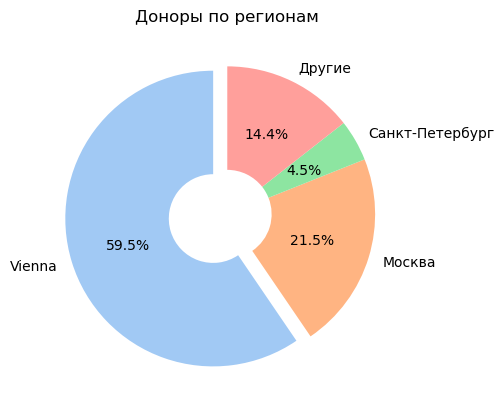

In [382]:
explode = (0.1,) + (0,)*3
colors = sns.color_palette('pastel')[ 0:10 ]

(areas_df.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors = colors,
            wedgeprops=dict(width=0.7), explode= explode))
plt.ylabel('');
plt.title('Доноры по регионам');

In [383]:
len(id_donor['timezone'].unique())

100

Вообще часовых поясов всего 24. Как так вышло, что их 100?

In [384]:
for name in id_donor['timezone'].unique():
    if str(name).startswith('E'):
        print(name)

Europe/Samara
Europe/Moscow
Europe/Minsk
Europe/London
Etc/GMT-10
Europe/Volgograd
Etc/GMT-2
Europe/Istanbul
Etc/GMT-5
Europe/Kaliningrad
Europe/Vilnius
Europe/Kirov
Etc/GMT-3
Europe/Athens
Europe/Saratov
Europe/Berlin
Etc/GMT-6
Europe/Simferopol
Europe/Vienna
Europe/Madrid
Europe/Kiev
Europe/Helsinki
Europe/Warsaw
Europe/Paris
Europe/Zurich
Europe/Astrakhan
Europe/Rome
Europe/Dublin
Europe/Brussels
Etc/GMT-7
Europe/Prague
Etc/GMT-12
Europe/Podgorica
Europe/Belgrade
Etc/GMT-8
Europe/Chisinau


Самара и Волгоград, например, находятся в 1 часовом поясе - считаем, что есть часовые дубли. К тому же, некоторые обозначаются просто GMT-7 или GMT-12. Видимо, сайт считает по каким-то другим данных или это различается из-за источников

In [385]:
id_donor[['cont_area', 'city_area']] = id_donor.timezone.str.split('/', expand=True, n=1)

In [386]:
id_donor.head()

,recurrent,volunteer,sex,area_name,timezone,time_source,user_id,inval_email,utc_datetime,sub,sub_sms,sub_email,sub_viber,sub_MobilePush,sub_WebPush,cont_area,city_area
0,NaN,NaN,female,Ульяновская область,Europe/Samara,Определили в трекере,2734,False,21.05.2023 13:19,NaN,NaN,True,NaN,NaN,NaN,Europe,Samara
1,False,NaN,female,Санкт-Петербург и ЛО,Europe/Moscow,Определили в трекере,2847,False,24.12.2023 5:41,NaN,NaN,True,NaN,NaN,NaN,Europe,Moscow
2,NaN,NaN,female,Москва и МО,Europe/Moscow,Определили в трекере,2861,False,10.03.2023 8:16,NaN,True,True,NaN,NaN,NaN,Europe,Moscow
3,NaN,NaN,female,Ростовская область,Europe/Moscow,Определили в трекере,3361,True,20.12.2022 9:36,NaN,NaN,False,NaN,NaN,NaN,Europe,Moscow
4,False,NaN,male,Москва и МО,Europe/Moscow,Определили в трекере,4982,False,18.12.2023 19:43,NaN,NaN,True,NaN,NaN,NaN,Europe,Moscow


In [387]:
continent_time = id_donor.loc[~id_donor['cont_area'].isna(),'cont_area'].value_counts()

continent_time

Europe       9162
Asia         2309
Etc            78
America        38
Africa         14
UTC            12
Pacific         5
Australia       2
Indian          2
Atlantic        1
Name: cont_area, dtype: int64

Мы уже знаем, что часть криентов, например, из часового пояса Европы или Атлантики может скрываться в Etc, их значение невелико по сравнению с Европой или Азией - скорее всего большиснтво пожертвователей все же из России и близлежащих стран. Поскольку задача стоит составить портрет пользователя(а не оценить топ-5 стран, например), мы можем пренебречь Etc и объединить с остальными

In [388]:
other = continent_time[continent_time.values < continent_time[3]].sum()
continent_time = pd.concat([continent_time.head(2), pd.Series({'Другие': other})])

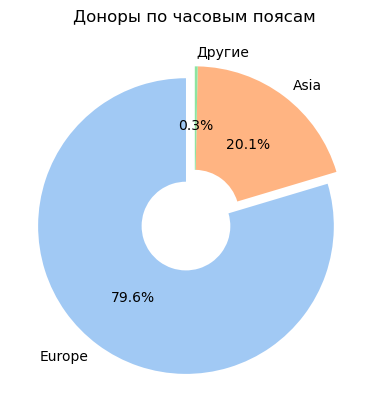

In [389]:
explode = (0.1,) + (0,)*2
colors = sns.color_palette('pastel')[ 0:10 ]

(continent_time.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors = colors,
            wedgeprops=dict(width=0.7), explode= explode))
plt.ylabel('');
plt.title('Доноры по часовым поясам');


Интересно посмотреть на пол. Скорее всего, будут привалировать сердобольные женщины

In [390]:
(id_donor[~id_donor['sex'].isna()]['sex'].value_counts() / sum(~id_donor['sex'].isna()) * 100 \
                                                        ).apply( lambda x : str(round(x,2)) + '%')

female    77.0%
male      23.0%
Name: sex, dtype: object

Действительно, более чем в 3 раза больше

In [391]:
continent_town = id_donor.loc[~id_donor['city_area'].isna(),'city_area'].value_counts()

continent_town

Moscow           8209
Yekaterinburg    1036
Samara            500
Krasnoyarsk       465
Novosibirsk       174
                 ... 
Sao_Tome            1
Midway              1
GMT-12              1
Toronto             1
Chisinau            1
Name: city_area, Length: 98, dtype: int64

In [392]:
# выведем топ-5
other = continent_town[continent_town.values < continent_town[5]].sum()
continent_town = pd.concat([continent_town.head(4), pd.Series({'Other': other})])

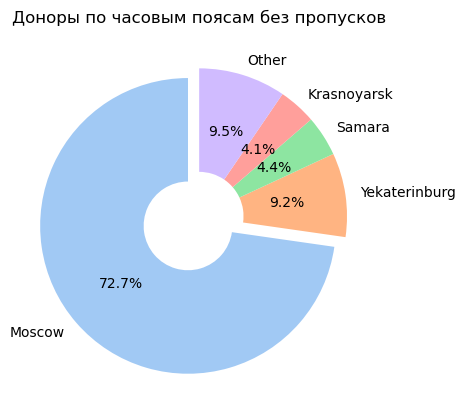

In [393]:
explode = (0.1,) + (0,)*4
colors = sns.color_palette('pastel')[ 0:10 ]

(continent_town.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors = colors,
            wedgeprops=dict(width=0.7), explode= explode))
plt.ylabel('');
plt.title('Доноры по часовым поясам без пропусков');


Действительно, очень много доноров часового пояса Москвы(Питер как город сюда входит). На 2 месте часовой пояс Екатеринбурга. Что ж, кажется, этой колонке можно доверять больше: у Вены +1, а не GMT+3

In [394]:
print('Количество волонтеров =',id_donor['volunteer'].sum())
print('Количество рекурентов =',id_donor['recurrent'].sum())
print('Всего человек =', id_donor.shape[0])

Количество волонтеров = 6
Количество рекурентов = 645
Всего человек = 23820


Немного необычно, что на 23820 человек всего 6 волонтеров. Это,скорее всего, оъясняется ручным внесением в базу(тогда как многие столбы, например, пол, определяются автоматически). Рекурент - это пользователь с ежемесячной подпиской. Их гораздо больше волонтеров, но немного по сравнению с общим количеством человек. Похоже, доброжелатели предпочитают разовые пожертвования.

In [395]:
# преведем в формат, в котором работают работники АиФ
id_donor['date_datetime'] = pd.to_datetime(
    id_donor['utc_datetime'], format='%d.%m.%Y %H:%M') + pd.Timedelta('3h')
del id_donor['utc_datetime']

In [396]:
id_donor['date'] = id_donor["date_datetime"].dt.date
id_donor['month']= id_donor["date_datetime"].dt.strftime('%Y-%m')

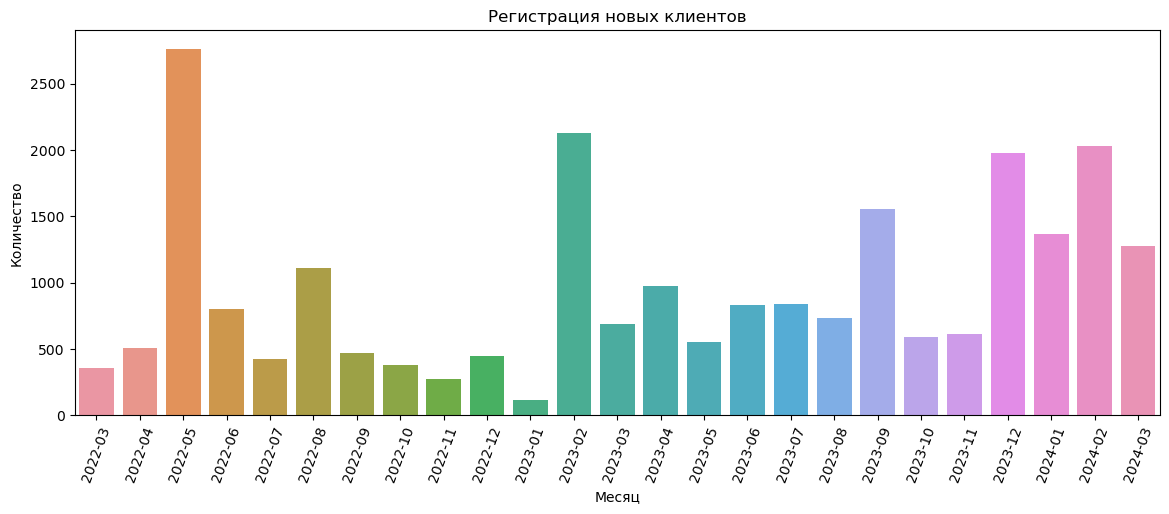

In [397]:
plt.figure(figsize=(14, 5))
sns.countplot(id_donor.sort_values(by='month'), x='month')
plt.xticks(rotation=70)
plt.xlabel('Месяц')
plt.ylabel('Количество')
plt.title('Регистрация новых клиентов');

Очень много регистраций в мае 2022 - пик. Также в феврале 2023 есть несколько. Похоже на некие маркетинговые кампании или дозагрузку данных. 

### import_df

In [ ]:
import_df.head()

,CustomerActionIdsMindboxId,CustomerActionActionTemplateIdsSystemName,CustomerActionActionTemplateName,CustomerActionDateTimeUtc,CustomerActionCreationDateTimeUtc,CustomerActionBrandIdsSystemName,CustomerActionChannelIdsMindboxId,CustomerActionChannelName,CustomerActionChannelIdsExternalId,CustomerActionChannelIdsSystemName,CustomerActionChannelUtmCampaign,CustomerActionChannelUtmSource,CustomerActionChannelUtmMedium,CustomerActionChannelUtmContent,CustomerActionChannelUtmTerm,CustomerActionCustomerIdsBackendID,CustomerActionCustomerIdsWebsiteID,CustomerActionCustomerIdsMindboxId
0,2734,ImportPriPerenoseIstoricheskoj,Импорт при переносе исторической базы клиентов,19.03.2022 21:30,19.03.2022 21:30,Dobroaif,9,Сайт,Site,Sajt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2734
1,2847,ImportPriPerenoseIstoricheskoj,Импорт при переносе исторической базы клиентов,19.03.2022 21:31,19.03.2022 21:31,Dobroaif,9,Сайт,Site,Sajt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2847
2,241801,ImportPriPerenoseIstoricheskoj,Импорт при переносе исторической базы клиентов,30.06.2022 11:10,30.06.2022 11:10,Dobroaif,9,Сайт,Site,Sajt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2861
3,2861,ImportPriPerenoseIstoricheskoj,Импорт при переносе исторической базы клиентов,19.03.2022 21:31,19.03.2022 21:31,Dobroaif,9,Сайт,Site,Sajt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2861
4,3361,ImportPriPerenoseIstoricheskoj,Импорт при переносе исторической базы клиентов,19.03.2022 21:31,19.03.2022 21:31,Dobroaif,9,Сайт,Site,Sajt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3361


В историческом импорте нас интересуют только идентификаторы пользователей - CustomerActionIdsMindboxId для использования в остальных датасетах

Однако, глянем чуть подробнее) Столбцы _CustomerActionDateTimeUtc_ и _CustomerActionCreationDateTimeUtc_  имеют одни и те же данные, поэтому будем рассматривать только один

In [398]:
columns = import_df.columns
dont_print = ['CustomerActionIdsMindboxId', 'CustomerActionDateTimeUtc', 'CustomerActionCreationDateTimeUtc', 'CustomerActionCustomerIdsMindboxId']
for col in columns:
    if col not in dont_print:
        print('Уникальные ', col, ':', import_df[col].unique())

Уникальные  CustomerActionActionTemplateIdsSystemName : ['ImportPriPerenoseIstoricheskoj']
Уникальные  CustomerActionActionTemplateName : ['Импорт при переносе исторической базы клиентов']
Уникальные  CustomerActionBrandIdsSystemName : ['Dobroaif']
Уникальные  CustomerActionChannelIdsMindboxId : [9 1]
Уникальные  CustomerActionChannelName : ['Сайт' 'Административный сайт Mindbox']
Уникальные  CustomerActionChannelIdsExternalId : ['Site' 'Administrator']
Уникальные  CustomerActionChannelIdsSystemName : ['Sajt' 'Administrator']
Уникальные  CustomerActionChannelUtmCampaign : [nan]
Уникальные  CustomerActionChannelUtmSource : [nan]
Уникальные  CustomerActionChannelUtmMedium : [nan]
Уникальные  CustomerActionChannelUtmContent : [nan]
Уникальные  CustomerActionChannelUtmTerm : [nan]
Уникальные  CustomerActionCustomerIdsBackendID : [nan]
Уникальные  CustomerActionCustomerIdsWebsiteID : [nan]


Есть некий перенос с сайта, а есть перенос админом. Интересно, в чем различие?

CustomerActionChannelUtmCampaign, CustomerActionChannelUtmSource, CustomerActionChannelUtmMedium, CustomerActionChannelUtmContent, CustomerActionChannelUtmTerm, CustomerActionCustomerIdsBackendID, CustomerActionCustomerIdsWebsiteID не имеют вообще никаких данных  
CustomerActionActionTemplateIdsSystemName и CustomerActionActionTemplateName содержат одну и ту же информацию => один из столбцов тоже можно удалить, та же история с CustomerActionChannelIdsExternalId и CustomerActionChannelIdsSystemName

In [409]:
# скажи НЕТ лишним столбцам!
old_users = pd.read_csv('import.csv',sep=';',encoding='cp1251',\
                        usecols = ['CustomerActionCustomerIdsMindboxId'])\
              .rename(columns={'CustomerActionCustomerIdsMindboxId':'user_id'},inplace=True)

In [410]:
import_df['CustomerActionDateTimeUtc'] = pd.to_datetime(
    import_df['CustomerActionDateTimeUtc'], format='%d.%m.%Y %H:%M')

In [400]:
print('Базу перенесли с', import_df['CustomerActionDateTimeUtc'].min(), 'по', import_df['CustomerActionDateTimeUtc'].max())

Базу перенесли с 18.04.2022 14:41 по 30.06.2022 11:11


In [402]:
print('за', len(import_df['CustomerActionDateTimeUtc'].dt.date.unique()), 'дня')

за 4 дня


Странно, переносили почти челых 2 месяца, но работу выполнили всего за 4 дня

###  order

In [403]:
 order.head()

,OrderIdsMindboxId = Идентификатор Mindbox,OrderFirstActionIdsMindboxId = Идентификатор Mindbox,OrderFirstActionDateTimeUtc = Дата и время оформления заказа по UTC,OrderFirstActionChannelIdsMindboxId = Идентификатор Mindbox,OrderFirstActionChannelIdsExternalId = Внешний идентификатор точки контакта,OrderFirstActionChannelName = Имя точки контакта,OrderAreaIdsExternalId = Идентификатор географической зоны клиента,OrderTransactionIdsExternalId = Идентификатор транзакции,OrderTotalPrice = Стоимость заказа,OrderIdsWebsiteID = Идентификатор заказа на сайте,...,OrderCustomFieldsNextPayDate = Дата след. Списания,OrderCustomFieldsRecurrent = Регулярный да/нет,OrderCustomFieldsRepayment = Повторный рекуррент,OrderLineProductIdsWebsite = Id продукта в Сайт,OrderLineProductName = Техническое название продукта,OrderLineQuantity = Количество единиц продукта,OrderLineBasePricePerItem = Базовая цена продукта за единицу продукта,OrderLinePriceOfLine = Конечная цена,OrderLineStatusIdsExternalId = Идентификатор статуса позиции заказа,OrderCustomerIdsMindboxId = Идентификатор Mindbox
0,14588,57400,27.01.2022 0:00,1,Administrator,Административный сайт Mindbox,NaN,NaN,500,1002892689,...,NaN,NaN,NaN,9847,Пожертвование Благотворительный фонд «АиФ. Доб...,1,NaN,500,Paid,6959
1,14756,57577,29.01.2022 0:00,1,Administrator,Административный сайт Mindbox,NaN,NaN,200,1004662779,...,NaN,NaN,NaN,9847,Пожертвование Благотворительный фонд «АиФ. Доб...,1,NaN,200,Paid,7103
2,14979,57807,31.01.2022 0:00,1,Administrator,Административный сайт Mindbox,NaN,NaN,300,1006728077,...,NaN,NaN,NaN,9847,Пожертвование Благотворительный фонд «АиФ. Доб...,1,NaN,300,Paid,7321
3,15101,57933,06.02.2022 0:00,1,Administrator,Административный сайт Mindbox,NaN,NaN,300,1011786329,...,NaN,NaN,NaN,9847,Пожертвование Благотворительный фонд «АиФ. Доб...,1,NaN,300,Paid,7143
4,16216,59062,28.02.2022 0:00,1,Administrator,Административный сайт Mindbox,NaN,NaN,50,1037151115,...,NaN,NaN,NaN,1,На уставную деятельность,1,NaN,50,Paid,7079


In [404]:
order.columns

Index(['OrderIdsMindboxId = Идентификатор Mindbox',
       'OrderFirstActionIdsMindboxId = Идентификатор Mindbox',
       'OrderFirstActionDateTimeUtc = Дата и время оформления заказа по UTC',
       'OrderFirstActionChannelIdsMindboxId = Идентификатор Mindbox',
       'OrderFirstActionChannelIdsExternalId = Внешний идентификатор точки контакта',
       'OrderFirstActionChannelName = Имя точки контакта',
       'OrderAreaIdsExternalId = Идентификатор географической зоны клиента',
       'OrderTransactionIdsExternalId = Идентификатор транзакции',
       'OrderTotalPrice = Стоимость заказа',
       'OrderIdsWebsiteID = Идентификатор заказа на сайте ',
       'OrderCustomFieldsNewyear = newyear',
       'OrderCustomFieldsNextPayDate = Дата след. Списания',
       'OrderCustomFieldsRecurrent = Регулярный да/нет',
       'OrderCustomFieldsRepayment = Повторный рекуррент',
       'OrderLineProductIdsWebsite = Id продукта в Сайт',
       'OrderLineProductName = Техническое название продукта',

In [411]:
order.rename(
    columns={
        'OrderIdsMindboxId = Идентификатор Mindbox':'payment_id',
        'OrderFirstActionIdsMindboxId = Идентификатор Mindbox': 'action_id',
        'OrderFirstActionDateTimeUtc = Дата и время оформления заказа по UTC': 'ordering_datetime',
        'OrderFirstActionChannelIdsMindboxId = Идентификатор Mindbox': 'in_touch_point_id',
        'OrderFirstActionChannelIdsExternalId = Внешний идентификатор точки контакта':'ext_touch_point_id',
        'OrderFirstActionChannelName = Имя точки контакта': 'touch_name',
        'OrderAreaIdsExternalId = Идентификатор географической зоны клиента': 'area_id',
        'OrderTransactionIdsExternalId = Идентификатор транзакции':'ext_transaction_id',
        'OrderTotalPrice = Стоимость заказа': 'tot_price',
        'OrderIdsWebsiteID = Идентификатор заказа на сайте ':'vendor_code',
        'OrderCustomFieldsNewyear = newyear':'new_year_promotion',
        'OrderCustomFieldsNextPayDate = Дата след. Списания': 'next_pay_date',
        'OrderCustomFieldsRecurrent = Регулярный да/нет': 'recurrent',
        'OrderCustomFieldsRepayment = Повторный рекуррент':'repayment',
        'OrderLineProductIdsWebsite = Id продукта в Сайт': 'product_id',
        'OrderLineProductName = Техническое название продукта':'product_name',
        'OrderLineQuantity = Количество единиц продукта':'quantity',
        'OrderLineBasePricePerItem = Базовая цена продукта за единицу продукта':'base_price',
        'OrderLinePriceOfLine = Конечная цена':'price',
        'OrderLineStatusIdsExternalId = Идентификатор статуса позиции заказа': 'status',
        'OrderCustomerIdsMindboxId = Идентификатор Mindbox': 'mindbox_id'},
    inplace=True)

In [412]:
order['product_name'].unique()[:5]

array(['Пожертвование Благотворительный фонд «АиФ. Доброе сердце» Никита Суриков',
       'На уставную деятельность',
       'Пожертвование Благотворительный фонд «АиФ. Доброе сердце» Роман Рыбаков',
       'Пожертвование Благотворительный фонд «АиФ. Доброе сердце» Полина Чинкова',
       'Пожертвование Благотворительный фонд «АиФ. Доброе сердце» Егор Цуканов'],
      dtype=object)

In [413]:
[name for name in order['product_name'].unique() if 'устав' in str(name) != -1]    

['На уставную деятельность']

Неявный дубликат: "на уставную деятельность". Помимо этого не понято зачем хранить такое огромное количество символов: было бы экономнее сократить(т.е. убрать из каждого 'Пожертвование Благотворительный фонд «АиФ. Доброе сердце»')

In [414]:
# убираем неявный дубликат
order['product_name'] = order['product_name']\
.replace('Пожертвование Благотворительный фонд «АиФ. Доброе сердце» Пожертвование на уставную деятельность БФ «АиФ. Доброе сердце»', \
         'На уставную деятельность')

In [415]:
# Какие строки может затронуть
[name for name in order['product_name'].unique() if '» ' not in str(name) != -1]  

['На уставную деятельность', nan]

In [416]:
order.loc[\
          order['product_name'] != 'На уставную деятельность','product_name'] = order['product_name']\
                                                                                    .str.split(pat='» ').str[1] 

In [417]:
# Раньше пропусков было 310, а сейчас?
order['product_name'].isna().sum()

310

In [418]:
order['quantity'].unique()

array([1], dtype=int64)

Каждое действие - разовая позиция. От этого стобца можно избавиться

In [419]:
del order['quantity']

ПО результатам общения с заказчиком выяснено, что базовая и конечная цены можно считать за одно и то же. Системой MindBox пользуются не только АиФ Доброе сердце, но и сервисы вроде Lamoda-которые имеют скидки. В таком случае, конечная цена учитывала бы какие-л. скидки.  
В нашем случае оставим тот столбец, где меньше пропусков

In [420]:
print('Пропусков в базовой цене:', order['base_price'].isna().sum())
print('Пропусков в конечной цене:', order['price'].isna().sum())

Пропусков в базовой цене: 14342
Пропусков в конечной цене: 0


In [421]:
del order['base_price']

Ранее в главе загрузки мы обнаружили 3 столбца, не имеющих данных. Идентификатор географической зоны клиента вполне определен в таблице id_donors и может быть извлечен оттуда. Внешний идентификатор транзакции также не предоставляет интереса

In [422]:
del order['area_id']
del order['ext_transaction_id']

In [423]:
# стоит сразу перевести столбец с датой в соотв тип
order['ordering_datetime'] = pd.to_datetime(
    order['ordering_datetime'], format='%d.%m.%Y %H:%M') + pd.Timedelta('3h')

In [424]:
print('с', order['ordering_datetime'].min(), 'по', order['ordering_datetime'].max())

с 2021-01-01 03:00:00 по 2024-03-18 15:03:00


Предполагаю какое-то глобальное разовое обновление. Например, в 2022г при переносе БД

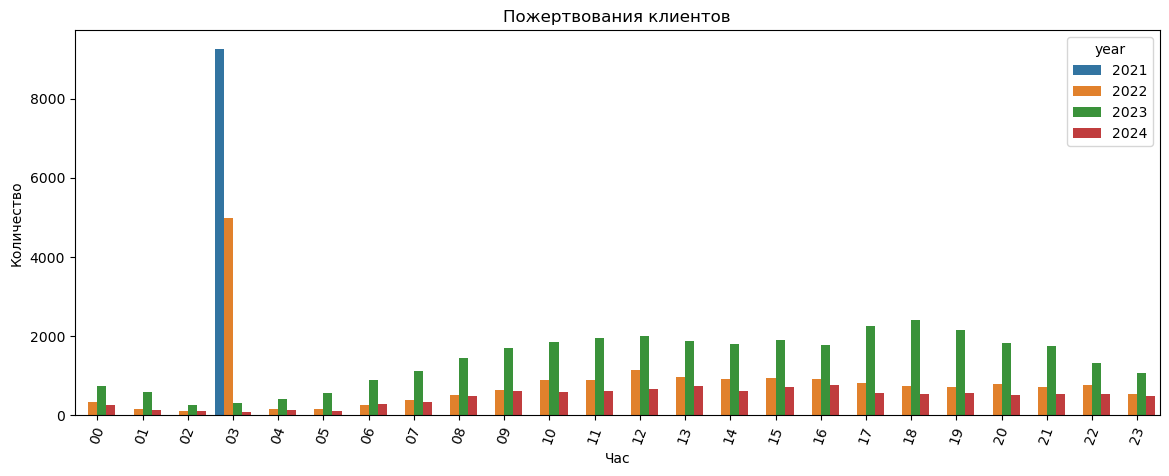

In [438]:
order['time'] = order['ordering_datetime'].dt.strftime('%H')
order['year'] = order['ordering_datetime'].dt.year
plt.figure(figsize=(14, 5))
sns.countplot(order.sort_values(by='time'), x='time', hue='year')
plt.xticks(rotation=70)
plt.xlabel('Час')
plt.ylabel('Количество')
plt.title('Пожертвования клиентов');

Что ж, подобная история происходит из-за 2021 и 2022гг. Можно также заметить активность во время и после обеда + около времени, когда люди уходят с работы. Мы можем так предположить, поскольку больше половины известного датасета находится в Московском часовом поясе

А вот смогу ли я спокойно спать, не зная причины всплеска? - нет. Поэтому сначала докопаемся

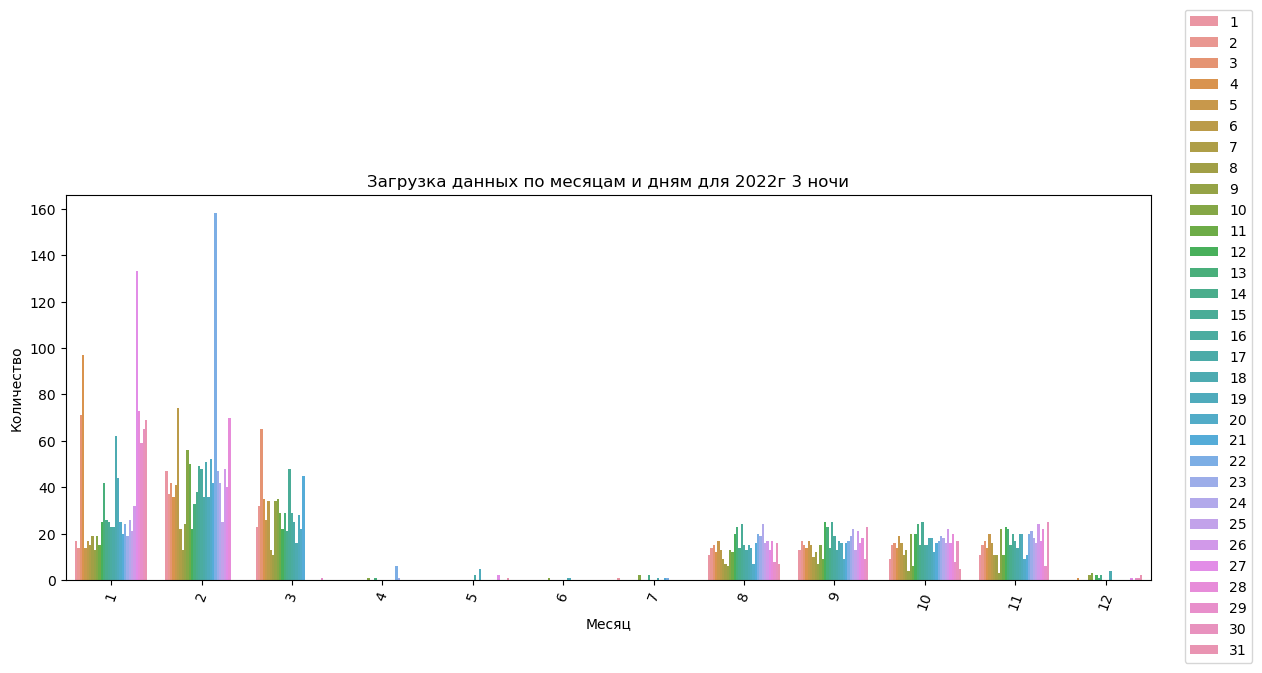

In [223]:
order['month'] = order['ordering_datetime'].dt.month
order['day'] = order['ordering_datetime'].dt.day
plt.figure(figsize=(14, 5))
sns.countplot(order[(order['year'] == 2022) & (order['time'] == '03')].sort_values(by='month'), x='month', hue='day')
plt.xticks(rotation=70)
plt.xlabel('Месяц')
plt.legend(bbox_to_anchor=(1.1,1.5))
plt.ylabel('Количество')
plt.title('Загрузка данных по месяцам и дням для 2022г 3 ночи');

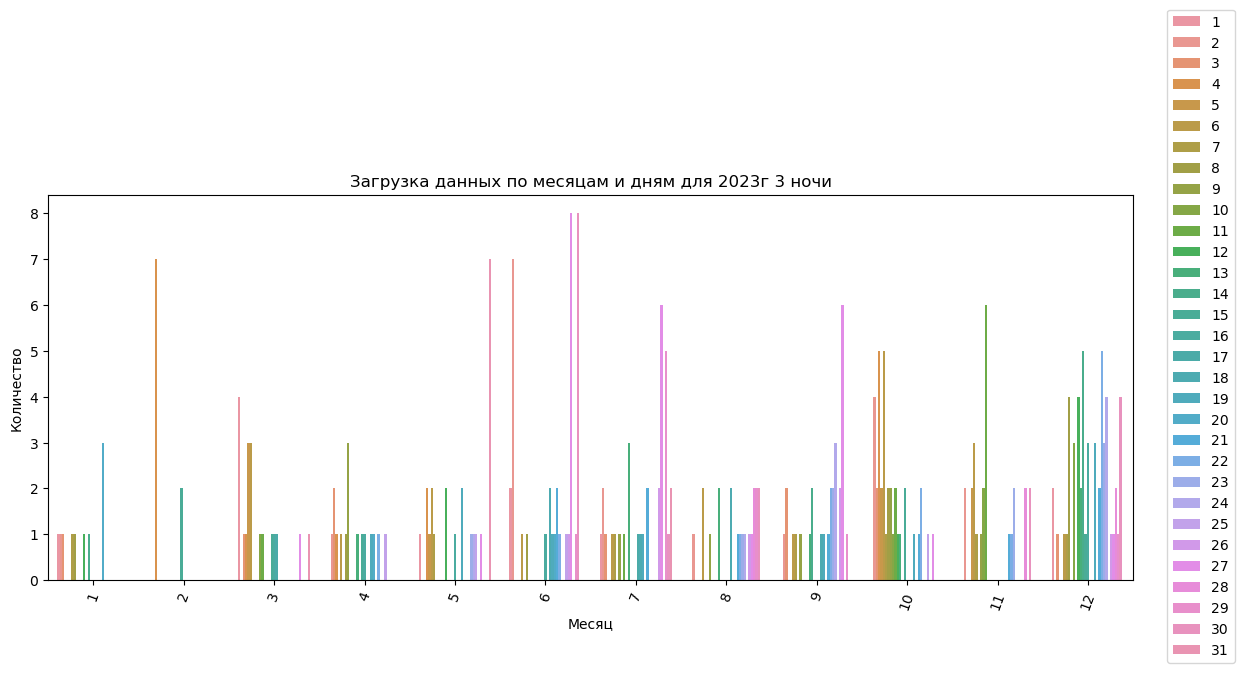

In [224]:
plt.figure(figsize=(14, 5))
sns.countplot(order[(order['year'] == 2023) & (order['time'] == '03')].sort_values(by='month'), x='month', hue='day')
plt.xticks(rotation=70)
plt.xlabel('Месяц')
plt.legend( bbox_to_anchor=(1.1,1.5))
plt.ylabel('Количество')
plt.title('Загрузка данных по месяцам и дням для 2023г 3 ночи');

Судя по всему это некоторые более-менее регулярные выгрузки. Выяснено, что в 3 утра - это платежи по подпискам (время в системе изначально московское было, просто название столбца ввело в заблуждение), а так раз в месяц в 12 по полуночи идет  всплеск платежей за счет подписок

In [ ]:
order['ext_touch_point_id'].unique()

array(['Administrator', 'Site'], dtype=object)

In [ ]:
order['touch_name'].unique()

array(['Административный сайт Mindbox', 'Сайт'], dtype=object)

Кажется, мы выяснили ответ на вопрос: что значит административный. А также нашли, что ext_touch_point_id и touch_name представляют одни и те же данные. Но на всякий случай проверим

In [ ]:
((order['touch_name'] == 'Сайт') == (order['ext_touch_point_id'] == 'Site')).all()

True

Можно с чистой совестью избавиться от еще одного столбца)

In [426]:
del order['touch_name']

new_year_promotion - столбец, отображающий принял ли участие пользователь в новогодней акции сбора пожертвований. Такая акция призвана также призвать новых пользователей.  Вдальнейшем проверим так ли это. А пока заполним все пропуски False

In [ ]:
order.loc[order['new_year_promotion'].isna(),'new_year_promotion'] = False

#### Исследование о провальных платежах

In [ ]:
order['status'].unique()

array(['Paid', 'fail', 'notpaid'], dtype=object)

Интересно посмотреть соотношение уникальных значений

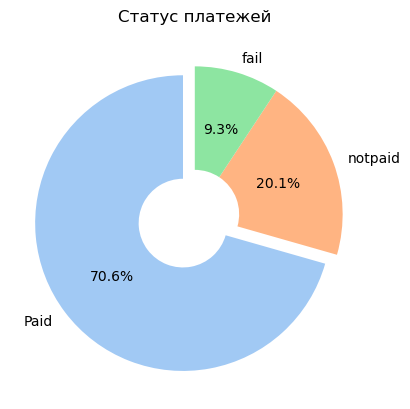

In [225]:
order_df = order['status'].value_counts()
explode = (0.1,) + (0,)*2
colors = sns.color_palette('pastel')[ 0:3 ]

(order_df.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors = colors,
            wedgeprops=dict(width=0.7), explode= explode))
plt.ylabel('');
plt.title('Статус платежей');

20% платежей зависло в неоплате, и более 9% с ошибкой. Взглянем поближе

In [227]:
notpaid = order[order['status']=='notpaid']
fail = order[order['status']=='fail']
print('Сумма зависших платежей: {:,} руб'.format(notpaid['price'].sum()))
print('Сумма неудавшихся платежей: {:,} руб'.format(fail['price'].sum()))

Сумма зависших платежей: 30,474,239 руб
Сумма неудавшихся платежей: 4,384,065 руб


In [ ]:
notpaid.head()

,payment_id,action_id,ordering_datetime,in_touch_point_id,ext_touch_point_id,tot_price,vendor_code,new_year_promotion,recurrent,repayment,product_id,product_name,price,status,mindbox_id
40,94116,253112,2022-07-04 15:16:00,9,Site,50,22983,False,True,NaN,558,Пожертвование (хочу помочь),50,notpaid,7079
48,102699,632768,2022-11-23 11:42:00,9,Site,100,35418,False,False,NaN,34036,Игнатий Овчинников,100,notpaid,2734
49,103027,638702,2022-11-30 13:28:00,9,Site,50,35936,False,False,NaN,35013,Максим Широкин,50,notpaid,7079
55,106440,718413,2022-12-20 12:31:00,9,Site,500,37859,False,False,NaN,35013,Максим Широкин,500,notpaid,3361
59,108812,1715447,2023-01-25 19:08:00,9,Site,500,41614,False,False,NaN,38550,Никита Яковлев,500,notpaid,7390


Похоже, есть тенденция в колонках ext_touch_point_id и in_touch_point_id. Радует, что это не сбой какого-то дня. Также видно, что есть рекуррент со статусом notpaid - что странно, ведь это подписка и, следовательно, автоматическое списание.

In [ ]:
display(notpaid['in_touch_point_id'].unique())
notpaid['ext_touch_point_id'].unique()

array([9], dtype=int64)

array(['Site'], dtype=object)

Все зависшие платежи оказались на сайте, нежели на 'Административный сайт Mindbox'. ВОзможно, это какая-то техническая проблема? Наврядли сайт может испытывать перегрузки, однако все ж проверим: посчитаем в какое время чаще всего зависала оплата

In [250]:
notpaid['timing'] = notpaid['ordering_datetime'].dt.hour
fail['timing'] = fail['ordering_datetime'].dt.hour
order['hour'] = order['ordering_datetime'].dt.hour

C:\Users\kate2\AppData\Local\Temp\ipykernel_17252\1761401014.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  notpaid['timing'] = notpaid['ordering_datetime'].dt.hour
C:\Users\kate2\AppData\Local\Temp\ipykernel_17252\1761401014.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fail['timing'] = fail['ordering_datetime'].dt.hour


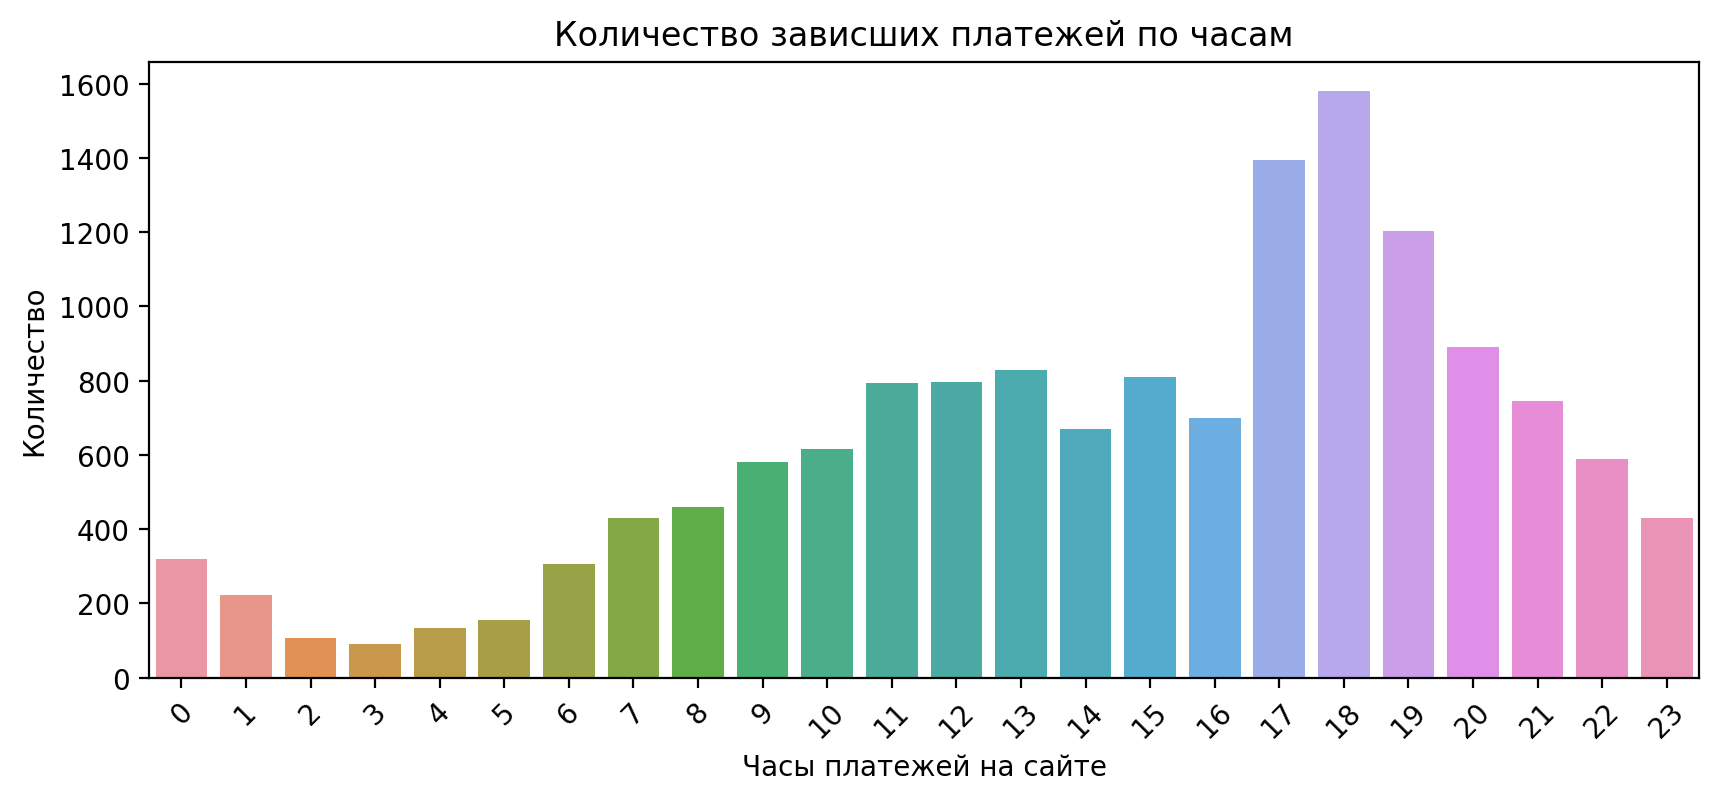

In [ ]:
plt.figure(figsize=(10,4),dpi=200)
my_plot = sns.countplot(data=notpaid, x='timing')
my_plot.set_xticklabels(my_plot.get_xticklabels(), rotation=45)
plt.xlabel('Часы платежей на сайте')
plt.ylabel('Количество')
plt.title('Количество зависших платежей по часам')
plt.show()

Видно, что активность несколько возрастает после 13(т.е. после обеда). Возможно, пользователи действительно забывают оплатить. Посмотрим в совокупности с другими статусами

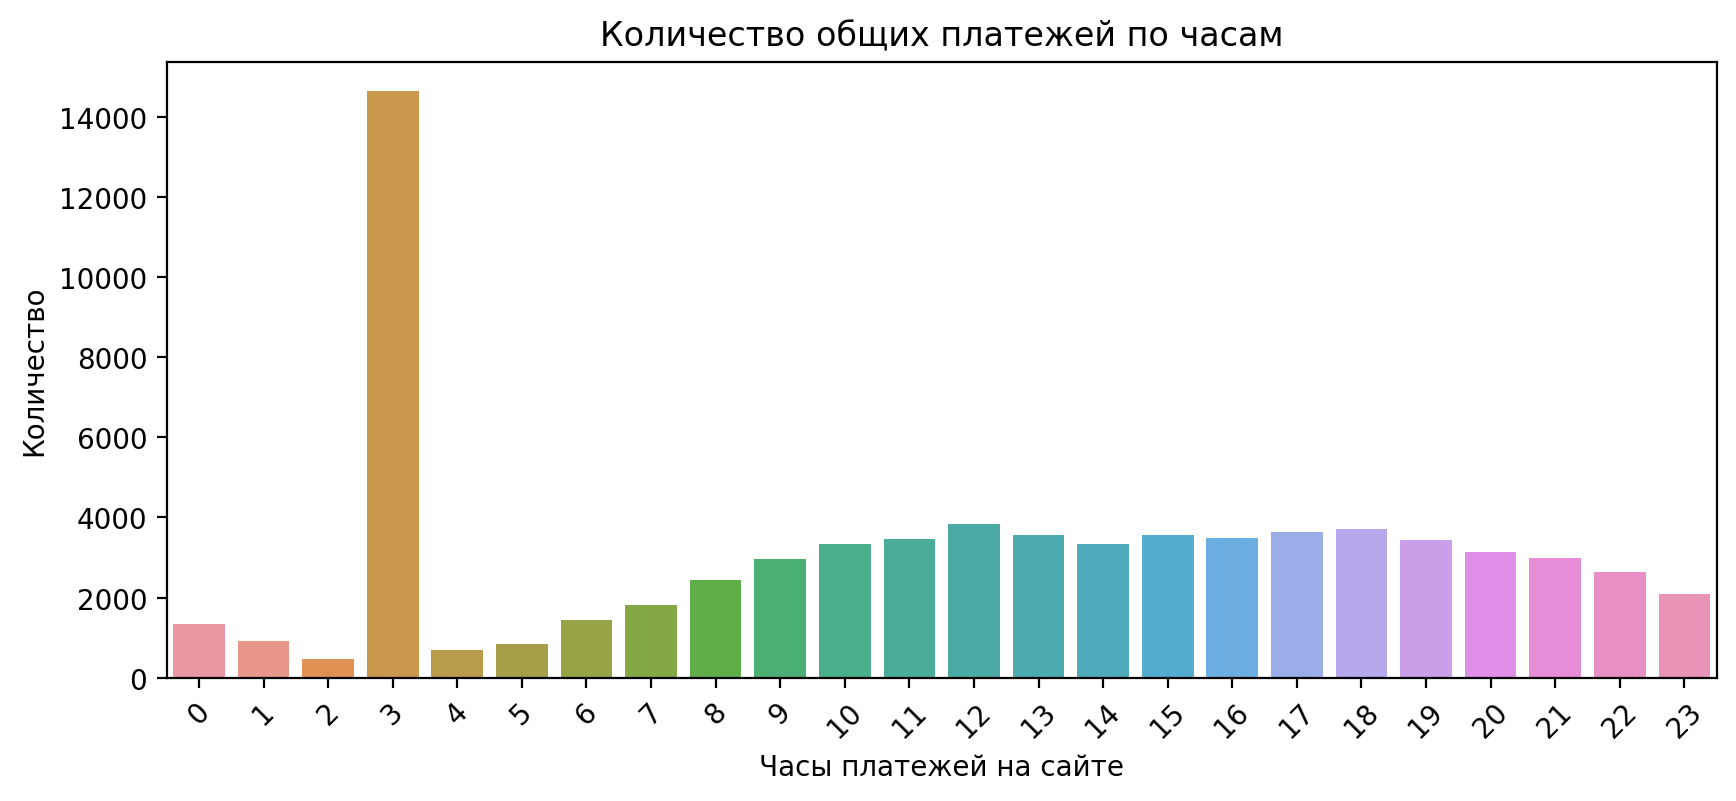

In [ ]:
plt.figure(figsize=(10,4),dpi=200)
my_plot = sns.countplot(data=order, x='hour')
my_plot.set_xticklabels(my_plot.get_xticklabels(), rotation=45)
plt.xlabel('Часы платежей на сайте')
plt.ylabel('Количество')
plt.title('Количество общих платежей по часам')
plt.show()

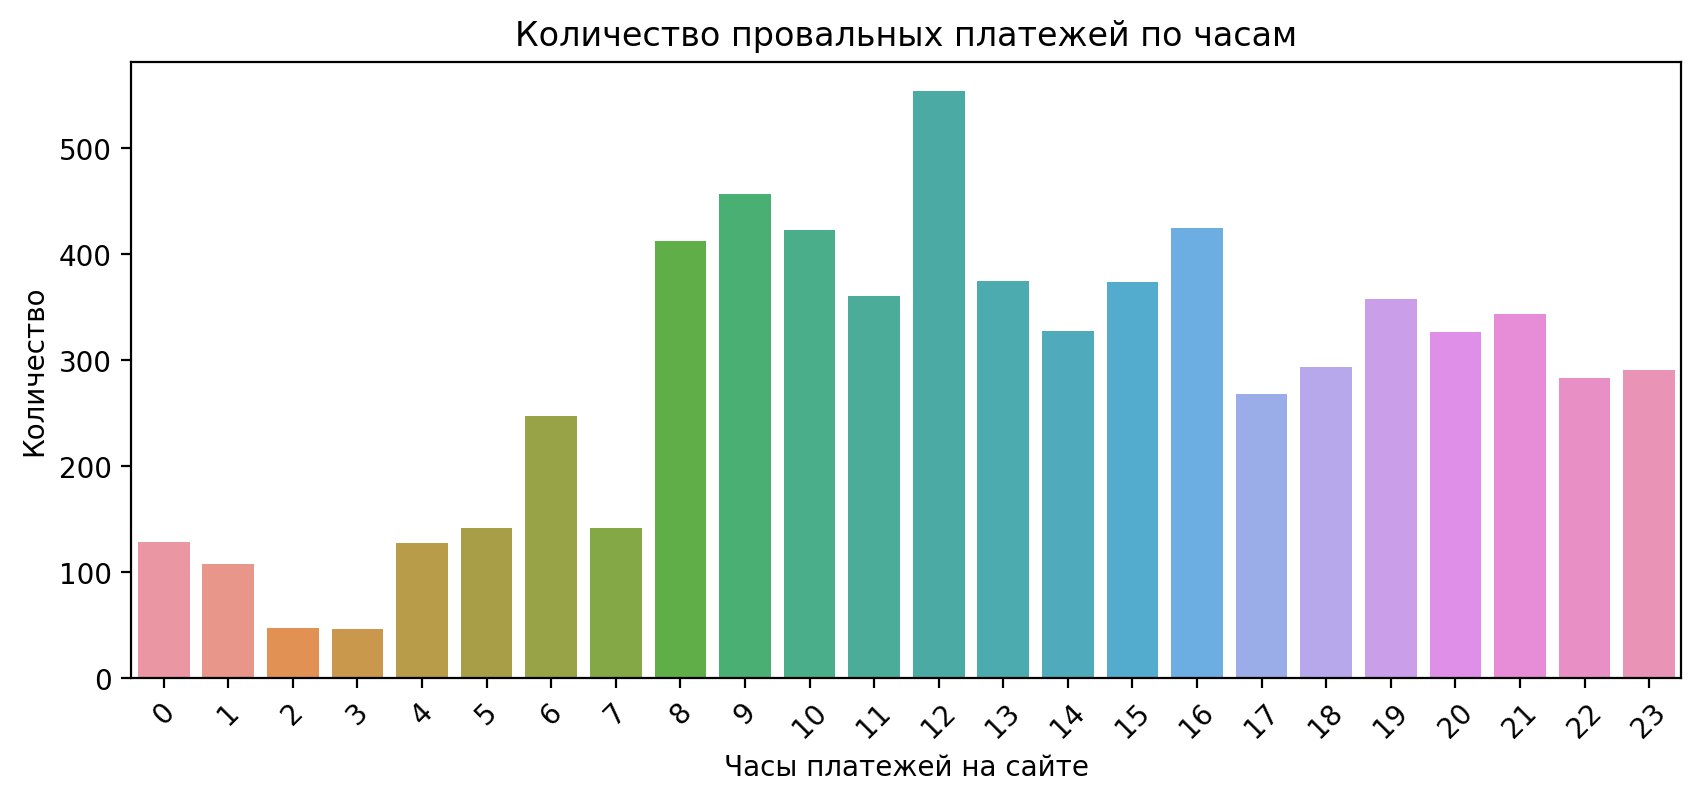

In [231]:
plt.figure(figsize=(10,4),dpi=200)
my_plot = sns.countplot(data=fail, x='timing')
my_plot.set_xticklabels(my_plot.get_xticklabels(), rotation=45)
plt.xlabel('Часы платежей на сайте')
plt.ylabel('Количество')
plt.title('Количество провальных платежей по часам')
plt.show()

C:\Users\kate2\AppData\Local\Temp\ipykernel_17252\1465598459.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fail['month'] = fail['ordering_datetime'].dt.strftime('%Y-%m')
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


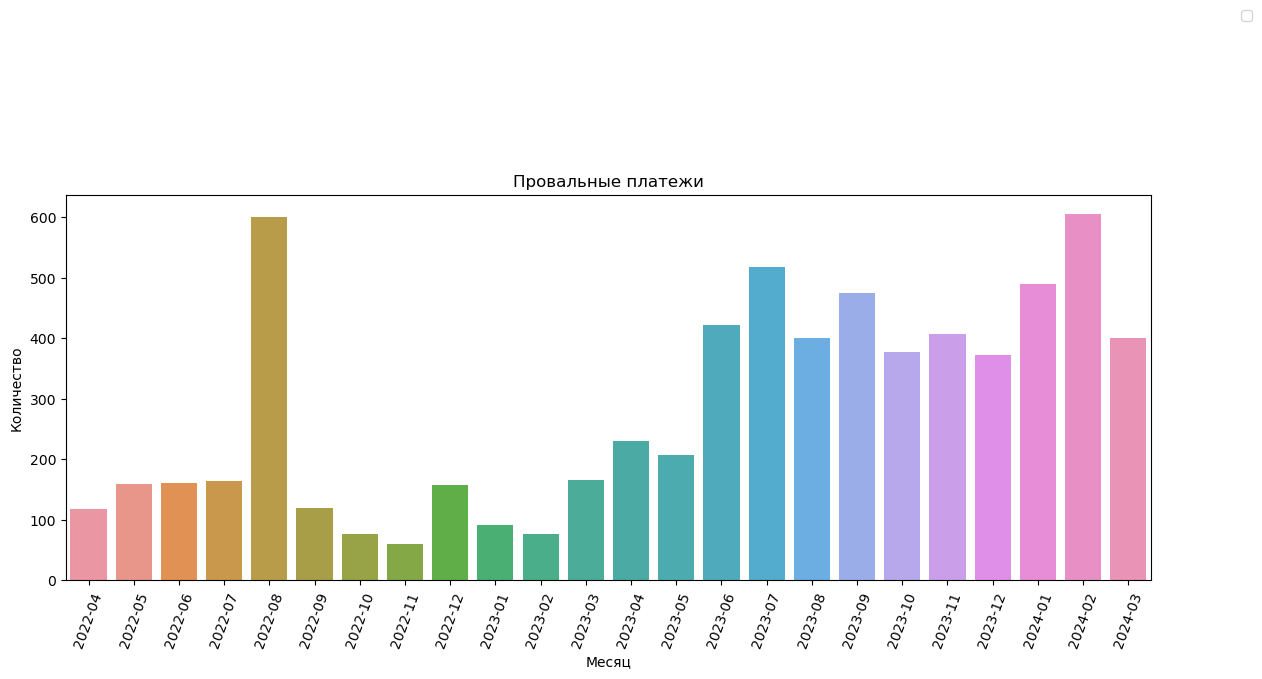

In [232]:
fail['month'] = fail['ordering_datetime'].dt.strftime('%Y-%m')
plt.figure(figsize=(14, 5))
sns.countplot(fail.sort_values(by='month'), x='month')
plt.xticks(rotation=70)
plt.xlabel('Месяц')
plt.ylabel('Количество')
plt.title('Провальные платежи по месяцам');

С февраля 2023 количество неудавшихся платежей начало расти. Скорее всего это вызвано ростом клиентов, т.к. как было найдено выше - в феврале 2023 всплеск новых регистраций. А вот пик августа 2022 - это странно. Зависит ли это ото дня?

C:\Users\kate2\AppData\Local\Temp\ipykernel_17252\588282947.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fail['day'] = fail['ordering_datetime'].dt.day
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


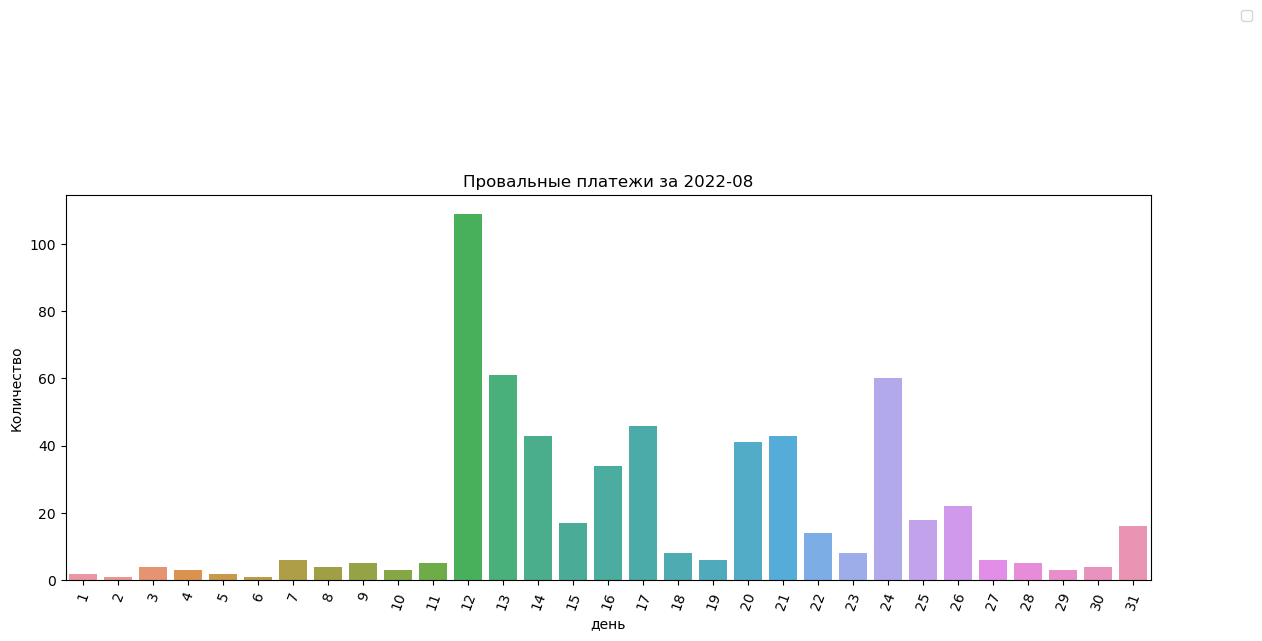

In [233]:
fail['day'] = fail['ordering_datetime'].dt.day
plt.figure(figsize=(14, 5))
sns.countplot(fail[fail['month'] == '2022-08'].sort_values(by='day'), x='day')
plt.xticks(rotation=70)
plt.xlabel('День')
plt.legend( bbox_to_anchor=(1.1,1.5))
plt.ylabel('Количество')
plt.title('Провальные платежи за 2022-08');

С 12го числа резко появились провальные платежи. Это интересно. Примерно через неделю количество спало до начального уровня и продолжались перепады до конца песяца, но такого пика как 12 числа не было!

У нас есть рекуренты, которые каждый месяц подписаны. Неужели 12 - это тот день, когда они перечисляют деньги фонду? Позьмем только рекуррентов и успешные платежи

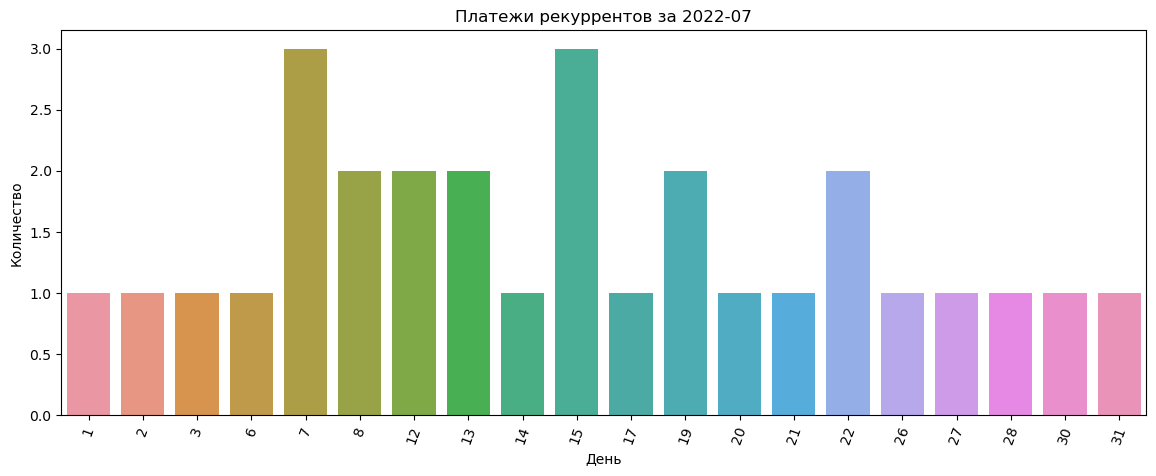

In [245]:
order['day'] = order['ordering_datetime'].dt.day
plt.figure(figsize=(14, 5))
sns.countplot(order[(order['status'] == 'Paid') & (order['recurrent'] == True) 
                    & (order['ordering_datetime'].dt.strftime('%Y-%m') == '2022-07')].sort_values(by='day'), x='day')
plt.xticks(rotation=70)
plt.xlabel('День')
plt.ylabel('Количество')
plt.title('Платежи рекуррентов за 2022-07');

Кажется, на тот момент не было определенного дня платежа рекуррентам. Основная теория - технический сбой, причем довольно продолжительный

Теперь посмотрим зависшие платежи

C:\Users\kate2\AppData\Local\Temp\ipykernel_17252\1646167843.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  notpaid['month'] = notpaid['ordering_datetime'].dt.strftime('%Y-%m')


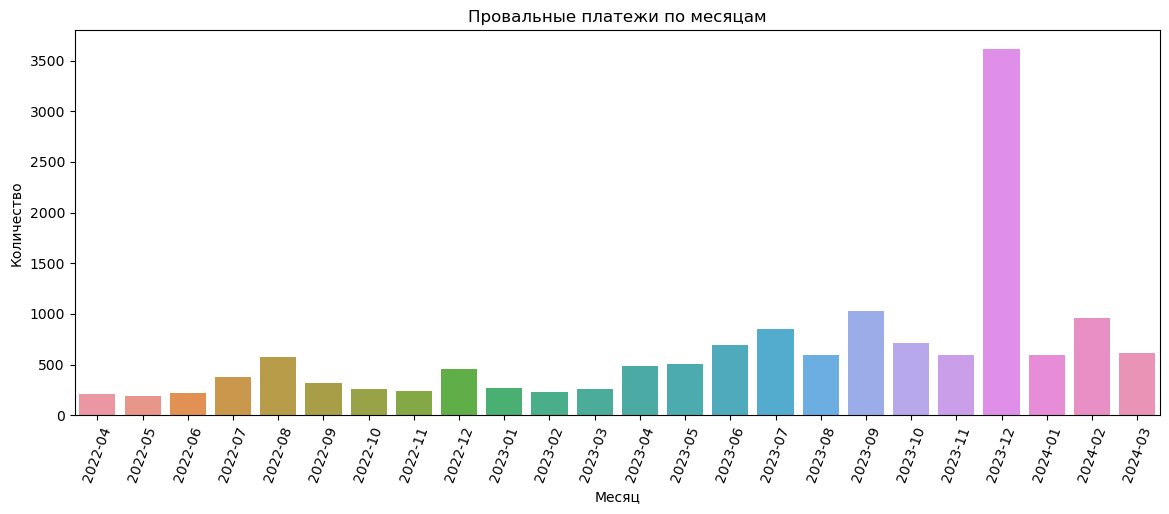

In [244]:
notpaid['month'] = notpaid['ordering_datetime'].dt.strftime('%Y-%m')
plt.figure(figsize=(14, 5))
sns.countplot(notpaid.sort_values(by='month'), x='month')
plt.xticks(rotation=70)
plt.xlabel('Месяц')
plt.ylabel('Количество')
plt.title('Провальные платежи по месяцам');

Тут все чуть более проще и стабильнее. Очень много зависло с декабря 2023. А если оп датам?

C:\Users\kate2\AppData\Local\Temp\ipykernel_17252\4140696854.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  notpaid['day'] = notpaid['ordering_datetime'].dt.day


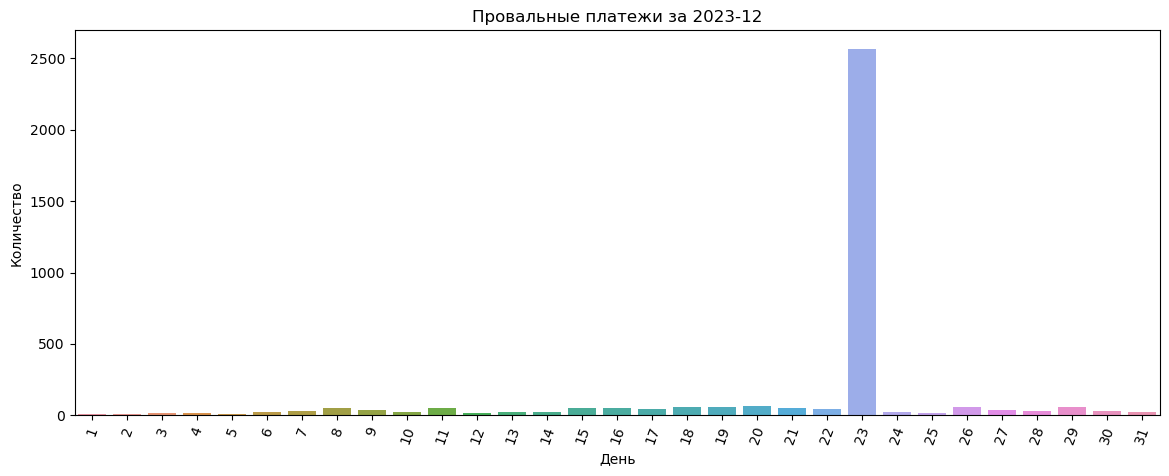

In [253]:
notpaid['day'] = notpaid['ordering_datetime'].dt.day
plt.figure(figsize=(14, 5))
sns.countplot(notpaid[notpaid['month'] == '2023-12'].sort_values(by='day'), x='day')
plt.xticks(rotation=70)
plt.xlabel('День')
plt.ylabel('Количество')
plt.title('Зависшие платежи за 2023-12');

Опа, даже в одну дату. А это выглядит как максимальный инсайт. Это в какое-то время? И сколько рублей висит за эту дату?

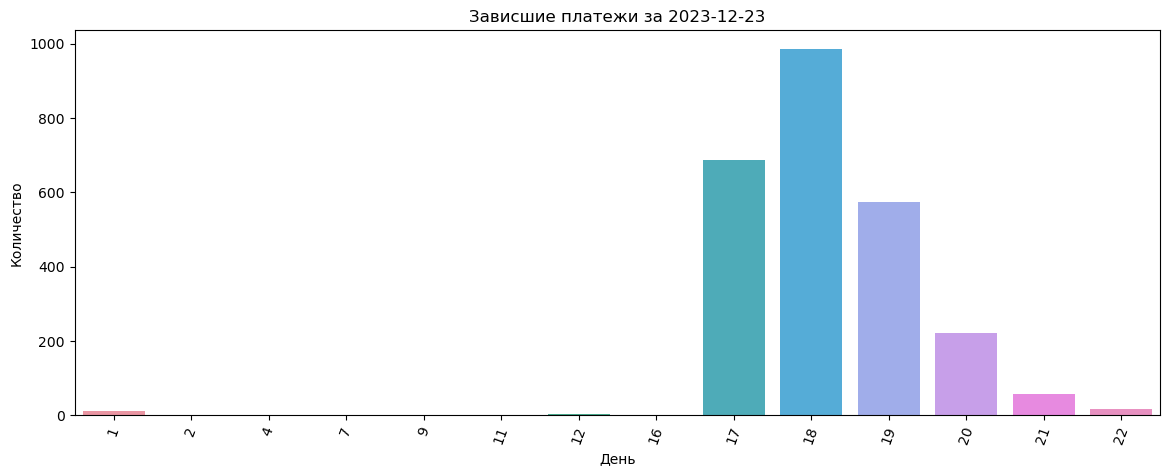

In [268]:
plt.figure(figsize=(14, 5))
sns.countplot(notpaid[notpaid['ordering_datetime'].dt.strftime('%Y-%m-%d') == '2023-12-23']\
              .sort_values(by='timing'), x='timing')
plt.xticks(rotation=70)
plt.xlabel('День')
plt.ylabel('Количество')
plt.title('Зависшие платежи за 2023-12-23');

In [255]:
print('Сумма зависших платежей за 2023-12-23: {:,} руб'.format(
    notpaid[notpaid['ordering_datetime'].dt.strftime('%Y-%m-%d') == '2023-12-23']['price'].sum()))

Сумма зависших платежей за 2023-12-23: 3,482,360 руб


Почти 3.5млн не дошли до Благотворительного фонда за каких-то 6ч? - Удивительно

Интересно, какой процент всего от рекурентов составляют те, кто столкнулся с проблемой зависшей оплаты?

395

In [267]:
print('Рекурренты с зависшей оплатой:{:.1%}'.format(len(notpaid[notpaid['recurrent'] == True]['mindbox_id'].unique())\
                                                    /len(order[order['recurrent'] == True]['mindbox_id'].unique())))
print('Количество рекуррентов со статусом notpaid:', len(notpaid[notpaid['recurrent'] == True]['mindbox_id'].unique()))
print('Количество рекуррентов:', len(order[order['recurrent'] == True]['mindbox_id'].unique()))

Рекурренты с зависшей оплатой:31.5%
Количество рекуррентов со статусом notpaid: 395
Количество рекуррентов: 1253


32% регулярных пожертвований остается в подвисшем виде? Это довольно много. Интересно, какой именно это убыток

In [ ]:
print('Сумма зависших платежей рекуррентов: {:,} руб'.format(notpaid[notpaid['recurrent']==True]['price'].sum()))

Сумма зависших платежей рекуррентов: 3,599,717 руб


Радует, что из 30млн только 3.6млн - рекурренты. Вообще оцень близко к недавней цифре за  2023-12-23

In [269]:
print('Сумма зависших платежей за 2023-12-23 рекуррентов: {:,} руб'.format(
    notpaid[(notpaid['ordering_datetime'].dt.strftime('%Y-%m-%d') == '2023-12-23')
           & (notpaid['recurrent']==True)]['price'].sum()))


Сумма зависших платежей за 2023-12-23 рекуррентов: 2,943,324 руб


##### Краткий вывод:
- за 2023-12-23 резко зависло множество платежей, за 6ч набежало порядка 3,482,360 руб, 2,943,324 руб из которых - платежи рекуррентов.
- Рекомендация: Создать рассылку для подвисших пользователей. 

### unpickled_data

In [302]:
print('Количество уникальных действий:',len(unpick := unpickled_data['user_action'].unique()))
print('Пример:')
sorted(unpick)[:5]

Количество уникальных действий: 1752
Пример:


['(копия, исправлено ТП) Спасибо за пожертвование. Новогодняя акция. 2',
 '(копия, исправлено ТП) Спасибо за пожертвование. Новогодняя акция. 2 Клик',
 '(копия, исправлено ТП) Спасибо за пожертвование. Новогодняя акция. 2 Не доставлено',
 '(копия, исправлено ТП) Спасибо за пожертвование. Новогодняя акция. 2 Не отправлялось',
 '(копия, исправлено ТП) Спасибо за пожертвование. Новогодняя акция. 2 Открытие']

#### Приведение к типу

In [427]:
# приведем к типу данных datetime в той главе
unpickled_data['action_date'] = pd.to_datetime(
    unpickled_data['action_date'], format='%Y-%m-%d')
unpickled_data['channel_id'] = unpickled_data['channel_id'].astype('string')
unpickled_data['utm_campaign'] = unpickled_data['utm_campaign'].astype('string')
unpickled_data['utm_source'] = unpickled_data['utm_source'].astype('string')

#### Неявные дубликаты

In [428]:
unpickled_data['utm_medium'].unique()

array([nan, 'cpa', 'social', 'media', 'email', 'sms', 'qr', 'cpc',
       'pop-up', 'banner', 'cpm', 'messenger', 'qr,qr', 'free', 'cpaa',
       'webpush', 'partner', 'email,email', 'referral', 'cpc_grant',
       'cpc,cpc'], dtype=object)

Думаю, 'cpc','cpc,cpc' и 'email','email,email' можно соединить в одно

In [429]:
# убираем неявный дубликат
replacement = {'cpc':'cpc,cpc', 'qr':'qr,qr', 'email':'email,email', 'cpa':'cpaa'}
for right, wrong in replacement.items():
    unpickled_data['utm_medium'] = unpickled_data['utm_medium'].replace(wrong, right)

In [430]:
la = lambda cell: cell.split(',')[0] if ',' in str(cell) else cell
unpickled_data['utm_medium'] = unpickled_data['utm_medium'].apply(la)

In [431]:
np.sort(unpickled_data[~unpickled_data['utm_source'].isna()]['utm_source'].unique())

array(['UniSender', 'Unisender', 'aif_gazeta', 'aif_web', 'ambassadors',
       'dobroe-aif.ru/ostanin', 'dobroe.aif.ru',
       'dobroe.aif.ru,unisender', 'edna', 'facebook', 'instagram',
       'marketolog', 'megafon', 'mindbox', 'mosoblgaz', 'mts',
       'mtsmarketolog', 'ntv-tv', 'of-events', 'ok', 'otklikischool',
       'outlook', 'partners', 'quiz', 'razovie', 'reccurent', 'roditeli',
       'rollup', 'sanofi', 'sberegiplanetu.ru', 'squiz', 'telegram',
       'unisender', 'vk', 'vk_ads', 'whatsapp', 'yandex', 'yandex-direct',
       'zen.yandex'], dtype=object)

Есть неявные дубликаты вроде UniSender и unisender. Впрочем, почти все в нижнем регистре, поэтому если перевести оставшиеся значения - UniSender пропадет сам собой

In [432]:
unpickled_data['utm_source'] = unpickled_data['utm_source'].str.lower()
# замена dobroe.aif.ru,unisender
unpickled_data['utm_medium'] = unpickled_data['utm_medium'].replace('dobroe.aif.ru,unisender', 'unisender')

#### Названия каналов

Несмотря на то, что с числами работать быстрее - будет выгоднее заменить channel_id на простые названия каналов

In [433]:
for key,value in channels_dict.items():
    unpickled_data.loc[unpickled_data['channel_id'] == key, 'channel_id'] = value

## Количество привлеченных пользователей по каналам (первое касание)

In [338]:
unpickled_data.groupby('user_id').agg({'action_date': 'min', 'channel_id': 'first'})\
                                .pivot_table(index = 'channel_id', values='action_date',aggfunc='count')\
                                .sort_values(by='action_date',ascending=False)

,action_date
channel_id,
Email,19427
Сайт,1995
Административный сайт Mindbox,1886
WebPush,133
utm_term Не указан,120
Прямой переход,103
vk.com,70
yandex.ru,35
instagram.com,18


Прямой перехрд - например, по ссылке от друга. Таких довольно много

In [362]:
unpickled_data.groupby('user_id').agg({'action_date': 'min', 'channel_id': 'first'})\
                                .pivot_table(index = 'channel_id', values=['action_date'],aggfunc='count')\
                                .sort_values(by='action_date',ascending=False)

,action_date
channel_id,
Email,19427
Сайт,1995
Административный сайт Mindbox,1886
WebPush,133
utm_term Не указан,120
Прямой переход,103
vk.com,70
yandex.ru,35
instagram.com,18


In [344]:
utm_dir_df = unpickled_data[(~unpickled_data['utm_source'].isna()) 
                               & (unpickled_data['channel_id'] == 'utm_term Не указан')
                              ]
print('Есть данные об источнике о переходе', utm_dir_df.shape[0])
print('Нет данных', unpickled_data[(unpickled_data['utm_source'].isna()) 
                            & (unpickled_data['channel_id'] == 'utm_term Не указан')
                              ].shape[0])

Есть данные об источнике о прямом переходе 41572
Нет данных 0


In [363]:
unpickled_data[(~unpickled_data['utm_source'].isna()) 
                               & (unpickled_data['channel_id'] == 'utm_term Не указан')
                              ].head(10)

,user_action,action_date,channel_id,utm_campaign,utm_source,utm_medium,user_id,action_time
14,Переход на сайт,2022-11-23,utm_term Не указан,ignatij-ovchinnikov,vk,cpa,2734,8
36,Переход на сайт,2023-03-29,utm_term Не указан,ratmir-shapovalov,vk,social,2847,15
48,Переход на сайт,2022-10-01,utm_term Не указан,mihail-rodimushkin,vk,cpa,2847,22
92,Переход на сайт,2022-12-07,utm_term Не указан,evelina-kvasova,vk,cpa,2861,14
104,Переход на сайт,2022-12-07,utm_term Не указан,evelina-kvasova,vk,cpa,2861,14
107,Переход на сайт,2023-01-07,utm_term Не указан,maksim-shirokin,aif_gazeta,media,3361,6
109,Переход на сайт,2023-01-02,utm_term Не указан,maksim-shirokin,aif_gazeta,media,3361,8
114,Переход на сайт,2022-12-20,utm_term Не указан,maksim-shirokin,aif_gazeta,media,3361,9
120,Переход на сайт,2022-12-20,utm_term Не указан,maksim-shirokin,aif_gazeta,media,3361,9
130,Переход на сайт,2022-12-23,utm_term Не указан,maksim-shirokin,aif_gazeta,media,3361,4


Много utm_term Не указан - а у него часто есть источник привлечения. К примеру,АиФ заплатил за рекламу ВК - и оттуда пришел пользователь А: по прямой ссылке, поэтому channel будет utm_term Не указан, но из ВК(utm_source = vk). Также utm_campaign обохначает проводимые кампении для маленьких пациентов.
Дополнительно просмотрим по столбцу utm_source

In [347]:
channels_ef = unpickled_data.groupby('user_id').agg({'action_date': 'min', 'utm_source': 'first'})
channels_efficiency = channels_ef.pivot_table(index = 'utm_source', values='action_date',aggfunc='count')\
                                    .sort_values(by='action_date',ascending=False)
channels_efficiency

,action_date
utm_source,
vk,3792
mindbox,3398
yandex-direct,835
instagram,673
aif_gazeta,359
marketolog,317
mtsmarketolog,198
edna,134
aif_web,127


Здесь ситуация уже гораздо более интересная. Больше всех привлек ВК. Почти в 3 раза меньше - mindbox. Стоит уточнить что он имеет в виду

In [ ]:
unpickled_data[unpickled_data['utm_source'] == 'mindbox']['utm_medium'].unique()

array(['email', 'pop-up', 'webpush'], dtype=object)

Выглядит как переход из имейлов по подпискам новостей, приветсвием новых посетителей и т.п. - в общем,вполне разумно, учитывая что система mindbox их и рассылает. Завершает топ-3 идет yandex-direct

Посмотрим на динамику по годам

In [353]:
channels_ef['year'] = channels_ef['action_date'].dt.year
channels_ef.pivot_table(index = 'utm_source',columns='year', values='action_date',aggfunc='nunique')\
.sort_values(by=2023,ascending=False)

year,2021,2022,2023,2024
utm_source,,,,
vk,56.0,213.0,319.0,78.0
mindbox,264.0,301.0,287.0,64.0
aif_gazeta,21.0,33.0,135.0,25.0
yandex-direct,6.0,156.0,127.0,26.0
mtsmarketolog,6.0,17.0,38.0,17.0
marketolog,31.0,60.0,32.0,NaN
aif_web,4.0,36.0,18.0,12.0
edna,4.0,3.0,16.0,16.0
dobroe.aif.ru,3.0,2.0,15.0,5.0


Видно, что за 2024г данные еще не успели накопиться. Всегда функционировали каналы "aif_gazeta","aif_web", "vk" и "yandex-direct".
Радует, что количество пользователей в большинстве растет стабильно.

Такой анализ подойдет для общего обзора и постоянных каналов(прямые переходы/сайт и т.п.), но на эффективность других каналов привлечения лучше смотреть с учетом того времени, на которое они покупались

## общая эффективность каналов (касание делить на общее количество)

In [ ]:
channels_efficiency['efficiency, %'] = round(channels_efficiency['action_date']/(channels_efficiency['action_date'].sum()) * 100,2)
channels_efficiency

,action_date,"efficiency, %"
utm_source,,
vk,3792,36.56
mindbox,3398,32.76
yandex-direct,835,8.05
instagram,673,6.49
aif_gazeta,359,3.46
marketolog,317,3.06
mtsmarketolog,198,1.91
edna,134,1.29
aif_web,127,1.22


Почти весь трафик составляют vk и mindbox. В дальнейшем стоит уделить им особое внимание

## new & old

### разделение базы на новых пользователей и исторический импорт

In [434]:
# по импорту разделим пользователей
new_users = unpickled_data[~unpickled_data['user_id'].isin(import_df['CustomerActionCustomerIdsMindboxId'])]\
                .sort_values(by='action_date')
old_users = unpickled_data[unpickled_data['user_id'].isin(import_df['CustomerActionCustomerIdsMindboxId'])]\
                .sort_values(by='action_date')

### Какие каналы привлекают
проанализировать какие каналы привлекают новых пользователей и эффективность каналов для новых пользователей

In [439]:
temp = new_users\
            .groupby('user_id').agg({'action_date': 'min', 'channel_id': 'first'})\
            .pivot_table(index = 'channel_id', values='action_date',aggfunc='count')\
             .sort_values(by='action_date',ascending=False)
temp['efficiency, %'] = round(temp['action_date']/(temp['action_date'].sum()) * 100,2)
temp

,action_date,"efficiency, %"
channel_id,,
Сайт,8268,50.18
Email,3409,20.69
Административный сайт Mindbox,1991,12.08
utm_term Не указан,969,5.88
Прямой переход,713,4.33
yandex.ru,354,2.15
vk.com,296,1.80
instagram.com,136,0.83
roditeli,107,0.65


In [440]:
new_users[new_users['channel_id'] == 'Email'].tail()

,user_action,action_date,channel_id,utm_campaign,utm_source,utm_medium,user_id,action_time
738761,RFM. Письмо 2 Отправка,2024-03-18,Email,<NA>,<NA>,NaN,43717,7
738789,RFM. Письмо 2 Отправка,2024-03-18,Email,<NA>,<NA>,NaN,43718,7
738790,RFM. Письмо 2,2024-03-18,Email,<NA>,<NA>,NaN,43718,7
739026,RFM. Письмо 2 Отправка,2024-03-18,Email,<NA>,<NA>,NaN,43721,7
739027,RFM. Письмо 2,2024-03-18,Email,<NA>,<NA>,NaN,43721,7


Видели выше и убедились снова - Email(которого немало в датафрейме)- отображение общих действий, поэтому здесь и далее снова анализируем по столбцу utm_source

In [447]:
source_new_users = new_users\
            .groupby('user_id').agg({'action_date': 'min', 'utm_source': 'first'})\
            .pivot_table(index = 'utm_source', values='action_date',aggfunc='count')\
             .sort_values(by='action_date',ascending=False)
source_new_users['efficiency, %'] = round(source_new_users['action_date']/(source_new_users['action_date'].sum()) * 100,2)
display(source_new_users)
top_10 = source_new_users.head(10).index

,action_date,"efficiency, %"
utm_source,,
vk,3831,44.43
mindbox,1514,17.56
yandex-direct,996,11.55
instagram,730,8.47
aif_gazeta,361,4.19
marketolog,283,3.28
mtsmarketolog,178,2.06
aif_web,144,1.67
edna,109,1.26


Что ж, разрез новых пользователей не сильно отличается от общего обзора. Ранее рассматривали mindbox, в этот раз поближе рассмотрим yandex-direct

In [441]:
new_users[new_users['utm_source'] == 'yandex-direct']['utm_campaign'].unique()

<StringArray>
['Кампания_Полина_Чинкова_CPA_Россия_17-05-2022',
        'Кампания_Полина_Чинкова_CPC_16-05-2022',
       '_Кампания_Полина_Чинкова_CPC_16-05-2022',
               'Polina-chinkova_CPC_no_graphics',
               'Polina-chinkova_CPA_no_graphics',
                                      '74316780',
                                             '0',
                                      '79926331',
                                      '82150215',
                                      '95332332',
                                      '95708450',
                                      '99343074',
                                     '105529376']
Length: 13, dtype: string

Кампания_Полина_Чинкова закончилась в 2022г. Не ясно что значат остальные идентификаторы( 

In [436]:
new_users[new_users['utm_source'] == 'yandex-direct']['utm_medium'].unique()

array(['cpa', 'cpc', 'cpc_grant'], dtype=object)

In [ ]:
old_users\
        .groupby('user_id').agg({'action_date': 'min', 'channel': 'first'})\
        .pivot_table(index = 'channel', values='action_date',aggfunc='count')\
        .sort_values(by='action_date',ascending=False)

,action_date
channel,
Административный сайт Mindbox,5701
Сайт,1452
Прямой переход,129
utm_term Не указан,30
vk.com,12
org.telegram.messenger,6
yandex.ru,6
instagram.com,5
google.com,2


Стоит также посмотреть по utm_source и  в сравнении с новыми

In [442]:
def one_plot_creator(df, x, y, color, text=None,
                     title='default tittle', xaxis_title='default xaxis tittle', yaxis_title='default yaxis tittle',
                     legend_title='default legend tittle', barmode='stack',
                     orientation='v', height=500, showlegend=True, for_export=False):

    fig = px.bar(df, x=x, y=y, color=color, text=text, barmode=barmode)

    fig.update_layout(
        height=height,
        showlegend=showlegend,
        title=title,
        xaxis_title=xaxis_title,
        yaxis_title=yaxis_title,
        legend_title=legend_title
    )

    if for_export == True:
        fig.update_layout({
            'plot_bgcolor': 'rgba(0, 0, 0, 0)',
            'paper_bgcolor': 'rgba(0, 0, 0, 0)',
        })

    return fig

In [448]:
source_old_users = (old_users
                    .groupby('user_id').agg({'action_date': 'min', 'utm_source': 'first'}) # выделим первый источник
                    .pivot_table(index = 'utm_source', values='action_date',aggfunc='count') # посчитаем количество
                    .reset_index(names='channel_id'))

source_old_users['efficiency, %'] = round(source_old_users['action_date']/(source_old_users['action_date'].sum()) * 100,2)
source_old_users['user'] = 'old'

In [449]:
source_new_users = source_new_users.reset_index(names='channel_id')

In [450]:
source_new_users['user'] = 'new'

In [451]:
data_subcategory = pd.concat([source_new_users,source_old_users])

In [452]:
fig = one_plot_creator(
    df=data_subcategory,
    x='channel', y='action_date', color='user', text='efficiency, %',
    title='Соотношение сетевых и несетевых заведений по категориям',
    xaxis_title='Категория', yaxis_title='Количество',
    legend_title='Обозначение',height=450
)
fig.show()

ValueError: Value of 'x' is not the name of a column in 'data_frame'. Expected one of ['channel_id', 'action_date', 'efficiency, %', 'user'] but received: channel

unisender -предыдущийаналог MondBox. Не удивительно, что его много. Однако, необычно что mindbox также оказался в топе. ВК, как выяснили, работал всегда. В целом очевидно, что ребята неплохо выросли с новыми пользователями. Посмотрим теперь на динамику каналов

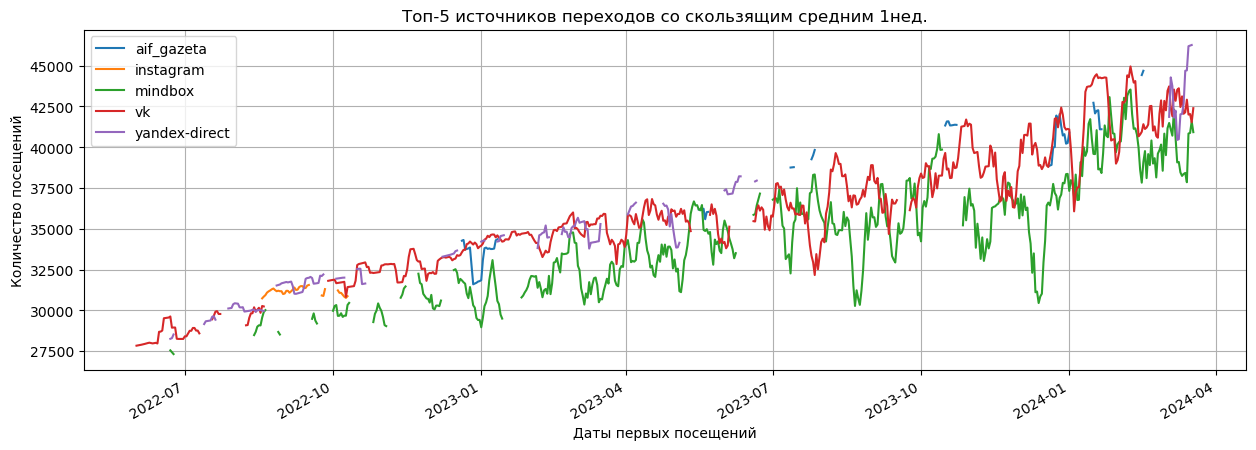

In [458]:
(new_users[(new_users['utm_source'].isin(top_10[:5]))] # пришлось ограничить, тк график был нечитаем
.pivot_table(
    index='action_date',  # даты первых посещений
    columns='utm_source',  # источники переходов
    values='user_id',  # ID пользователей
    aggfunc='first'  # подсчёт первого захода пользователя - сработает в силу сортировки по дате выше
).rolling(7) #скользящее среднее - 1 недели
.mean())\
.plot(figsize=(15, 5), grid=True)
plt.title('Топ-5 источников переходов cо скользящим средним 1нед.')
plt.xlabel('Даты первых посещений')
plt.legend()
plt.ylabel('Количество посещений');

Кажется, сервис стабильно растет - все больше и больше пользователей. Регулярно используемые - vk и mindbox. Виден какой-то разрыв в данных около июня 2023. Каких-то выраженных активностей или тенденций нет.

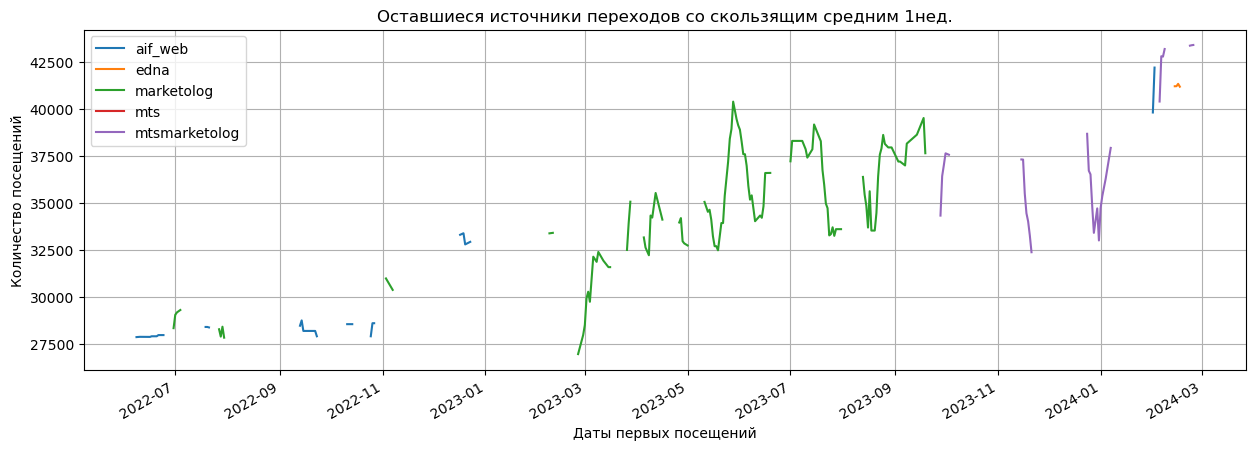

In [459]:
(new_users[(new_users['utm_source'].isin(top_10[5:]))] # пришлось ограничить, тк график был нечитаем
.pivot_table(
    index='action_date',  # даты первых посещений
    columns='utm_source',  # источники переходов
    values='user_id',  # ID пользователей
    aggfunc='first'  # подсчёт первого захода пользователя - сработает в силу сортировки по дате выше
).rolling(7) #скользящее среднее - 2 недели
.mean())\
.plot(figsize=(15, 5), grid=True)
plt.title('Оставшиеся источники переходов cо скользящим средним 1нед.')
plt.xlabel('Даты первых посещений')
plt.legend()
plt.ylabel('Количество посещений');

Каждый из каналов просуществовал нестабильно, в какой-то промежуток.

In [461]:
active_and_old = unpickled_data[(unpickled_data['user_id'].isin(old_users['user_id']))
                                & (unpickled_data['action_date'].dt.year == 2024)]

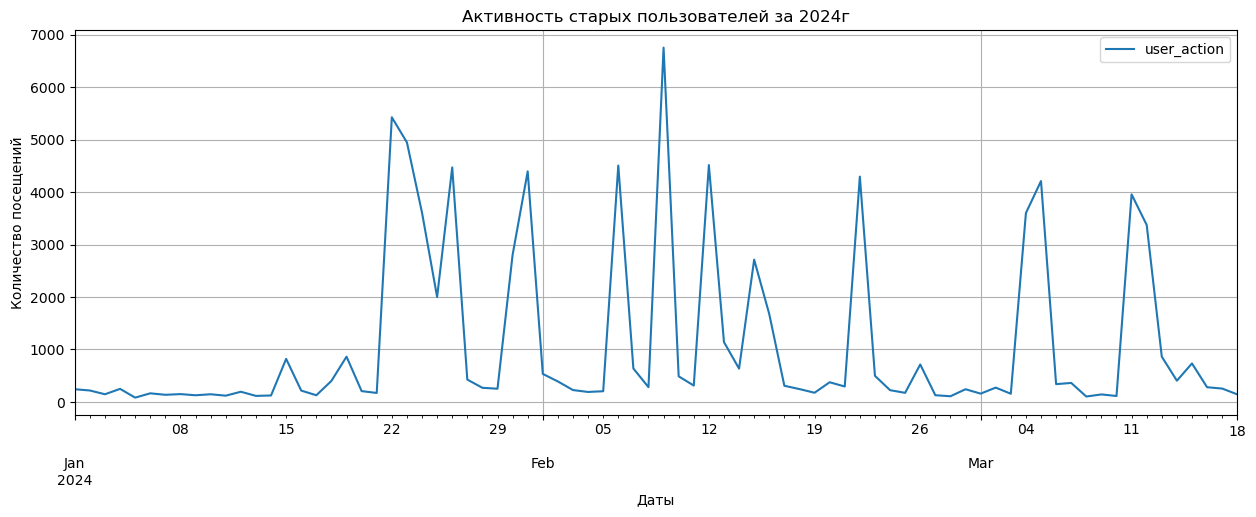

In [462]:
active_and_old.groupby('action_date').agg({'user_action':'count'}).plot(figsize=(15, 5), grid=True)
plt.title('Активность старых пользователей за 2024г')
plt.xlabel('Даты')
plt.ylabel('Количество посещений');

## RFM анализ - в процессе доработки и не нуждается в проверке

По каждому покупателю выделяем информацию для анализа:

— как давно была последняя покупка (Recency);

— сколько всего было покупок всего (Frequency);

— сумма всех покупок (Monetary).

In [556]:
# Устанавливаем отчетную дату на +1 день к финальной дате датасета
now = order.ordering_datetime.dt.date.max() + pd.Timedelta('1d')
now

datetime.date(2024, 3, 19)

In [529]:
order['ordering_date'] = order['ordering_datetime'].dt.date

In [554]:
rfm = order.groupby('mindbox_id').agg({'ordering_date': ['max', 'count'], 'price': 'sum'})
rfm.columns = ['last_date', 'total_orders', 'total_sum']
rfm.head()

,last_date,total_orders,total_sum
mindbox_id,,,
2734,2022-11-23,3,151
2847,2023-12-24,5,2000
2861,2022-12-07,7,120
3361,2022-12-20,2,3500
4982,2024-02-13,11,840


### Recency
- как давно была последняя покупка
- Давность заказа: 1 — давние, 2 — «спящие», 3 — недавние;

In [561]:
# рассчет по тому как давно заходили последний раз в днях
rfm['days_inactive'] = (now - rfm['last_date'])

In [564]:
rfm['R'] = pd.qcut(rfm['days_inactive'], 3, labels=[3, 2, 1])

Timedelta('539 days 00:00:00')

In [603]:
print(f'1:{rfm[rfm["R"] == 1]["days_inactive"].min()} - {rfm[rfm["R"] == 1]["days_inactive"].max()}')
print(f'2:{rfm[rfm["R"] == 2]["days_inactive"].min()} - {rfm[rfm["R"] == 2]["days_inactive"].max()}')
print(f'3:{rfm[rfm["R"] == 3]["days_inactive"].min()} - {rfm[rfm["R"] == 3]["days_inactive"].max()}')

1:539 days 00:00:00 - 1173 days 00:00:00
2:156 days 00:00:00 - 538 days 00:00:00
3:1 days 00:00:00 - 155 days 00:00:00


### Frequency
- сколько всего было покупок всего
- Частота покупок: 1 — разовые, 2 — редкие, 3 — частые;

In [586]:
pd.qcut(rfm['total_orders'].value_counts(), 3).unique()

[(16.0, 12745.0], (2.0, 16.0], (0.999, 2.0]]
Categories (3, interval[float64, right]): [(0.999, 2.0] < (2.0, 16.0] < (16.0, 12745.0]]

In [590]:
bins = [0.999, 2.0, 16.0, 12745.0]
labels=[1, 2, 3]

In [604]:
rfm['F'] = pd.cut(rfm['total_orders'], bins=bins, labels=labels)
print(f'1:{rfm[rfm["F"] == 1]["total_orders"].min()} - {rfm[rfm["F"] == 1]["total_orders"].max()}')
print(f'2:{rfm[rfm["F"] == 2]["total_orders"].min()} - {rfm[rfm["F"] == 2]["total_orders"].max()}')
print(f'3:{rfm[rfm["F"] == 3]["total_orders"].min()} - {rfm[rfm["F"] == 3]["total_orders"].max()}')

1:1 - 2
2:3 - 16
3:17 - 2542


### Monetary
- сумма всех покупок
- 1 — низкий чек, 2 — средний чек, 3 — высокий чек

In [605]:
rfm['M'] = pd.qcut(rfm['total_sum'], 3, labels=[1, 2, 3])
print(f'1:{rfm[rfm["M"] == 1]["total_sum"].min()} - {rfm[rfm["M"] == 1]["total_sum"].max()}')
print(f'2:{rfm[rfm["M"] == 2]["total_sum"].min()} - {rfm[rfm["M"] == 2]["total_sum"].max()}')
print(f'3:{rfm[rfm["M"] == 3]["total_sum"].min()} - {rfm[rfm["M"] == 3]["total_sum"].max()}')

1:0 - 300
2:301 - 1000
3:1003 - 16699857


### Итог

In [614]:
rfm['RFM'] = rfm['R'].astype('string') + rfm['F'].astype('string') + rfm['M'].astype('string')

In [620]:
rfm = rfm.reset_index()
rfm

,index,mindbox_id,last_date,total_orders,total_sum,days_inactive,R,F,M,RFM
0,0,2734,2022-11-23,3,151,482 days,2,2,1,221
1,1,2847,2023-12-24,5,2000,86 days,3,2,3,323
2,2,2861,2022-12-07,7,120,468 days,2,2,1,221
3,3,3361,2022-12-20,2,3500,455 days,2,1,3,213
4,4,4982,2024-02-13,11,840,35 days,3,2,2,322
...,...,...,...,...,...,...,...,...,...,...
21365,21365,46784,2024-03-18,1,300,1 days,3,1,1,311
21366,21366,46785,2024-03-18,1,500,1 days,3,1,2,312
21367,21367,46786,2024-03-18,2,1000,1 days,3,1,2,312
21368,21368,46787,2024-03-18,1,300,1 days,3,1,1,311


Как читать:

|R - recency|F - frequency|M - monetary|
|:--|:--|:--|
|**1** - был более 539 дней назад|**1** - сделал более 16 покупок |**1** - заплатил менее 300 рублей за все время|
|**2** - был от 156 до 538  дней назад|**2** - сделал от 3 до 16 покупок |**2** - заплатил от 301 до 1000 рублей за все время|
|**3** - был менее 155 дней назад|**3** - делал менее 2 покупок |**3** - заплатил более 1001 рублей за все время|

In [622]:
rfm_info = rfm.groupby('RFM').agg({'total_orders': 'mean',
                        'days_inactive': 'mean',
                        'total_sum': ['mean', 'sum'],
                        'mindbox_id': 'nunique'})

In [623]:
rfm_info.columns = ['mean_visits', 'mean_days_inactive', 'mean_order', 'total_sum', 'total_users']

In [624]:
rfm_info.style.format(thousands='.', decimal=',', precision=2).highlight_max(color='forestgreen')

,mean_visits,mean_days_inactive,mean_order,total_sum,total_users
RFM,,,,,
111,"1,06",762 days 09:34:14.883406560,"186,54",551.970,2.959
112,"1,18",761 days 21:18:28.805261232,"674,59",1.846.364,2.737
113,"1,35",767 days 17:53:13.475533248,"5.448,06",4.342.106,797
121,"4,29",776 days 00:34:17.142857144,"190,98",8.021,42
122,"4,27",736 days 12:40:14.906832296,"683,48",110.041,161
123,"5,09",691 days 09:12:28.514851488,"6.769,24",2.734.773,404
131,"26,00",650 days 00:00:00,"90,00",90,1
132,"17,00",608 days 00:00:00,"698,00",698,1
133,"29,33",659 days 17:20:00,"24.715,00",444.870,18


In [628]:
rfm_info.style.highlight_max(color='forestgreen')

,mean_visits,mean_days_inactive,mean_order,total_sum,total_users
RFM,,,,,
111,1.058804,762 days 09:34:14.883406560,186.539371,551970,2959
112,1.177201,761 days 21:18:28.805261232,674.594081,1846364,2737
113,1.346299,767 days 17:53:13.475533248,5448.062735,4342106,797
121,4.285714,776 days 00:34:17.142857144,190.976190,8021,42
122,4.273292,736 days 12:40:14.906832296,683.484472,110041,161
123,5.091584,691 days 09:12:28.514851488,6769.240099,2734773,404
131,26.000000,650 days 00:00:00,90.000000,90,1
132,17.000000,608 days 00:00:00,698.000000,698,1
133,29.333333,659 days 17:20:00,24715.000000,444870,18
